# **Import Libraries**

## **Explanation:**
##Used to Import furture libraries for future use.

In [ ]:
import geopandas as gp # Geographic data analysis library used for working with spatial data.
import pandas as pd # Library that allows for the processing and analysis of tabular data.
import numpy as np # for numerical operations
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting
import re # regular expression manipulation

from shapely.geometry import Point # Point class allows for the creation geometric points from coordinate data.
from google.colab import drive # Allows for the access of data from the Google drive for use in Google Colab.
from pandas.plotting import scatter_matrix # Scatter Matrix for Selected Features

##**Interpretation:**
## Throught the file these libraries will help us interpret, convert, and visualize our information.


---



#**Data Use Location**

## **Explanation:**
## The datasets that we have regarding fires and state sizes are in our Google drive. With this code we can grab that information and use it in this coding space.

In [ ]:
# Specifies that we can use data in our Google Drive under '/content/drive'.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Interpretation:**
## Now that we can access our datasets from the share Google we can use it for our data interpretation code.


---



#**National Fire Datasets Manipulation**

##**Explanation:**
##We are extracting the datasets for reported national fires from the USFS national fires occurences dataset and creating exact geographical points for the datasets.

In [ ]:
# low_memory=False: At the cost of memory, large sums of data can be extracted all at once resulting in better accuracy.
df = pd.read_csv('/content/drive/MyDrive/CS4330/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv', low_memory=False)   # Dataset for National fires occurences

# zip(df['X'], df['Y']): Combines the lists of X and Y together returning a iterater of tuples.
# With this iterator we can place it's tuples into the long_lad point object to designate fire locations.
# Point(long_lad): Creates a gemetric point in space using the coordinate values of X and Y in space so
# that we can use the coordinates to pin point specific fire location.
fires = [Point(long_lad) for long_lad in zip(df['X'], df['Y'])]

# GeoDataFrame: Creates a table of combining data using the df dataset to create a spatial-enabled dataframe.
# crs="EPSG:4326": Classifies the coordinate system to be used when pin pointing specific coordinates.
# EPSG:4326 is the WGS84 or World Geodetic System 1984 that allows for mapping latitudes and logitudes.
# geometry=fires: Takes the geometric points in fires to define a points location.
loc_df = gp.GeoDataFrame(df, geometry=fires, crs="EPSG:4326")
loc_df

,X,Y,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,FIREYEAR,...,LONGDD83,FIRETYPECATEGORY,POINTTYPE,PERIMEXISTS,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE,geometry
0,-106.427778,39.846111,231055009,{540C6E70-51FD-4CCC-A1B3-8A6C914E34A3},2B1B9A1B-7828-4688-A14C-4BD7CEE62226,NaN,2023/03/29 11:10:56+00,Elliott Ridge,NaN,2016.0,...,-106.42778,WF,General,N,Yes,215,2024/09/24 04:01:09+00,24000.0,NaN,POINT (-106.42778 39.84611)
1,-107.935556,39.372778,231055010,{ACE77CF8-1281-4A81-BE3D-4D55669CB134},A2454D64-EBB7-4895-81BC-9782B3D1391E,NaN,2023/03/29 11:10:59+00,Battlement Mesa Reservoir,NaN,2016.0,...,-107.93556,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.93556 39.37278)
2,-106.723333,39.118333,231055011,{D8EA7329-A0D0-4B64-A6F2-7A7FD86A3505},NaN,NaN,2023/03/29 11:10:56+00,Difficult,NaN,1997.0,...,-106.72333,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.72333 39.11833)
3,-106.590000,39.656667,231055012,{67A72390-0E2B-411E-9CDE-6657101645E4},NaN,NaN,2023/03/29 11:10:56+00,,NaN,1993.0,...,-106.59000,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-106.59 39.65667)
4,-107.317311,40.019286,231055013,{DFFF8D93-DE89-451C-830C-1F65FD550B3D},558D5D61-AB04-4AC3-8143-2E0EBE7CB506,NaN,2024/03/27 14:21:08+00,Paradise,NaN,2020.0,...,-107.31731,WF,General,Y,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN,POINT (-107.31731 40.01929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582029,-123.351389,40.951389,231639252,{5F229FD0-02EB-45BF-9FF8-203DA2166E2F},NaN,NaN,2019/01/02 00:00:00+00,MILLER,NaN,2005.0,...,-123.35139,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-123.35139 40.95139)
582030,-118.751667,34.648056,231639253,{483F5A91-BF46-4F42-B201-D3F310BD5974},NaN,NaN,2019/01/02 00:00:00+00,TRACTOR,NaN,2010.0,...,-118.75167,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-118.75167 34.64806)
582031,-117.477222,34.313333,231639254,{D07AAFF1-AA11-49A6-AEC3-E6F7E4200869},NaN,NaN,2019/01/02 00:00:00+00,MIDDLE2,NaN,2009.0,...,-117.47722,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-117.47722 34.31333)
582032,-121.106944,38.978056,231639255,{A56C6E42-6C6A-474A-8904-04321166EC30},NaN,NaN,2019/01/02 00:00:00+00,CRAMER,NaN,1996.0,...,-121.10694,WF,Unknown,N,No,5,2024/09/24 04:11:11+00,NaN,NaN,POINT (-121.10694 38.97806)


## **Interpretation:**
## As a result, we have added a geographic pinpoint to dataset which allows us to have a proper world location for reported fires on our axes.


---



#**US Boundry Datasets Manipulation**

##**Explanation:**
## We are looking to extact and convert the shapes of the states and counties from the 2024 US census in order to pinpoint the fires reported in the US.

In [ ]:
# US census data of county and state geometric boundary data.
county_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_county/tl_2024_us_county.shp')
state_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_state/tl_2024_us_state.shp')

# Coverts the coordinates system, consistent with our coordinate systems already used in our code, to identify the mapping of states and counties.
county_shapes = county_shapes.to_crs("EPSG:4326")
state_shapes = state_shapes.to_crs("EPSG:4326")

print(county_shapes)
print('\n')
print(state_shapes)

     STATEFP COUNTYFP  COUNTYNS  GEOID         GEOIDFQ       NAME  \
0         31      039  00835841  31039  0500000US31039     Cuming   
1         53      069  01513275  53069  0500000US53069  Wahkiakum   
2         35      011  00933054  35011  0500000US35011    De Baca   
3         31      109  00835876  31109  0500000US31109  Lancaster   
4         31      129  00835886  31129  0500000US31129   Nuckolls   
...      ...      ...       ...    ...             ...        ...   
3230      13      123  00351260  13123  0500000US13123     Gilmer   
3231      27      135  00659513  27135  0500000US27135     Roseau   
3232      28      089  00695768  28089  0500000US28089    Madison   
3233      48      227  01383899  48227  0500000US48227     Howard   
3234      54      099  01550056  54099  0500000US54099      Wayne   

              NAMELSAD LSAD CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT  \
0        Cuming County   06      H1  G4020  None   None     None        A   
1     Wahkiakum C

##**Interpretation:**
## As a result, we have pinpointed the geograpical shapes of the US states and counties.
---



#**Creation of Counties Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the counties in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
# gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects"): Combines the geodataframes of county boundary data and fire locations within the US.
# how="left": Keeps all data records even if they do not match.
# predicate="intersects": Outlines that fire data with be assigned to county boundary data if the fire is with in or touching county lines
counties = gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects")
# counties.rename(columns = {'NAME':'COUNTY'}, inplace = True): Renames to specify that the column specified as 'NAME' is called 'COUNTY'.
# inplace = True: Updates the columns name instead of making a modified copy.
counties.rename(columns = {'NAME':'COUNTY'}, inplace = True)
# Specifies the only columns that should be listed in counties.
counties = counties[['Y', 'X', 'COUNTY', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
counties

,Y,X,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Eagle,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Garfield,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Pitkin,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Eagle,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Rio Blanco,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,Trinity,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,Los Angeles,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,San Bernardino,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,Placer,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and county, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---



#**Creation of States Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the states in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
# gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects"): Combines the geodataframes of state boundary data and fire locations within the US.
states = gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects")
states.rename(columns = {'NAME':'STATE'}, inplace = True)
states = states[['Y', 'X', 'STATE', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]
states

,Y,X,STATE,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY
0,39.846111,-106.427778,Colorado,2016.0,A,0.25,Camping,WF
1,39.372778,-107.935556,Colorado,2016.0,A,0.10,Camping,WF
2,39.118333,-106.723333,Colorado,1997.0,A,0.10,Lightning,WF
3,39.656667,-106.590000,Colorado,1993.0,A,0.10,Undetermined,WF
4,40.019286,-107.317311,Colorado,2020.0,A,0.10,Camping,WF
...,...,...,...,...,...,...,...,...
582029,40.951389,-123.351389,California,2005.0,B,0.50,Undetermined,WF
582030,34.648056,-118.751667,California,2010.0,A,0.10,Equipment,WF
582031,34.313333,-117.477222,California,2009.0,A,0.10,Equipment,WF
582032,38.978056,-121.106944,California,1996.0,C,10.00,Equipment,WF


##**Interpretation:**

## Now we have a new dataset with the x, y, and states, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---

#**Merging of Counties and States Datasets**

##**Explanation:**
## Now that we have our unique datasets for US states and counties, we now want to merge them for a final dataset we can use throught the project.

In [ ]:
# Merges the counties and states datasets.
# on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']: Specifies the matching data of these two sets to combined on.
# how='inner': Specifies to include only simalar data in the new data set.
us_fires = pd.merge(counties, states, on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY'], how='inner')
us_fires = us_fires.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
us_fires

,LATITUDE,LONGITUDE,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY,STATE
0,39.846111,-106.427778,Eagle,2016.0,A,0.25,Camping,WF,Colorado
1,39.372778,-107.935556,Garfield,2016.0,A,0.10,Camping,WF,Colorado
2,39.118333,-106.723333,Pitkin,1997.0,A,0.10,Lightning,WF,Colorado
3,39.656667,-106.590000,Eagle,1993.0,A,0.10,Undetermined,WF,Colorado
4,40.019286,-107.317311,Rio Blanco,2020.0,A,0.10,Camping,WF,Colorado
...,...,...,...,...,...,...,...,...,...
672023,40.951389,-123.351389,Trinity,2005.0,B,0.50,Undetermined,WF,California
672024,34.648056,-118.751667,Los Angeles,2010.0,A,0.10,Equipment,WF,California
672025,34.313333,-117.477222,San Bernardino,2009.0,A,0.10,Equipment,WF,California
672026,38.978056,-121.106944,Placer,1996.0,C,10.00,Equipment,WF,California


##**Interpretation:**
##We have now merge the two datasets to get a dataset with both US counties and states regarding fire reports and all the details regarding those reports. We have also managed to clarify that the x and y are the longitudes and latitudes.


---



#**ERRORS and Formating Problems**

##**Explanation:**
##We are now looking to identify all of the errors regarding formating issues, repeating values, data outliers that cannot be intrepreted or corrected, and data with no values. Depending on the circumstance we want to either correct or eliminate this data before we start creating any visual graphs. If not that information will influence the resulting output significantly enough to change our final results.

In [ ]:
# Wrong values outide of recorded US history with no way of correcting them to identify FIREYEAR value = Eliminate
fireyear_print = us_fires['FIREYEAR'].fillna(-1)
fireyear_print = fireyear_print[(fireyear_print < 1900) | (fireyear_print > 2024)].replace(-1, np.nan)
fireyear_print = list(fireyear_print.unique())
print('FIREYEAR row elimination:', fireyear_print)
print('\n')

# Incorrect number of decimal places for FIREYEAR = correction changes needed
print('FIREYEAR decimal place correction needed:')
print(us_fires['FIREYEAR'].head())
print('\n')

# FIRETYPECATEGORY text and missing, unidentifable or incorrect abreviation values = correction changes needed
abbreviation_symbols = ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
print('Needed convertions for FIRETYPECATEGORY abbreviated strings:', list(us_fires[us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('Incorrect FIRETYPECATEGORY values:', list(us_fires[~us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique()))
print('\n')

# STATCAUSE category labeling issue with missing or unidentifiable value representations, incorrect spelling,
# and unnescessary character use = correction changes needed
cause_category = ['Camping', 'Lightning', 'Undetermined', 'Smoking', 'Debris/Open Burning', 'Other Human Cause',
                  'Incendiary', 'Equipment', 'Railroad', 'Other Natural Cause', 'Utilities', 'Firearms/Weapons',
                  'Natural', 'Human', 'Miscellaneous', 'Debris Burning', 'Equipment Use', 'Children', 'Campfire', 'Debris burning',
                  'Arson', 'Powgen/trans/distrib', 'Equip/vehicle use', 'Other causes', 'Investigated But Und', 'Cause not Identified']
print('Incorrect values, spelling and strings for STATCAUSE:', list(us_fires[~us_fires['STATCAUSE'].isin(cause_category)]['STATCAUSE'].unique()))
print('\n')

# Missing COUNTY value = correction changes needed
print('Number of nan COUNTY value:', us_fires['COUNTY'].isna().sum())
print('\n')

# Missing STATE value = correction changes needed
print('Number of nan STATE value:', us_fires['STATE'].isna().sum())
print('\n')

# Combination of missing COUNTY & STATE values = Eliminate
print('Number rows with nan COUNTY & STATE values that need to be eliminated:', us_fires[(us_fires['COUNTY'].isna()) & (us_fires['STATE'].isna())].shape[0])
print('\n')

# TOTALACRES category missing value representations = correction changes needed
print('Num of nan TOTALACRES Values:', us_fires['TOTALACRES'].isna().sum())
print('\n')

# Missing LONGITUDE or LATITUDE Values = Eliminate
print('Num of rows with missing LONGITUDE Values to be eliminated:', us_fires['LONGITUDE'].isna().sum())
print('\n')
print('Num of rows with missing LATITUDE Values to be eliminated:', us_fires['LATITUDE'].isna().sum())
print('\n')

# SIZECLASS category has missing or unidentifiable value representations and incorrect symbol
# = correction changes needed
# A list of the letters for the fire class sizes
fire_class_symbol = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
print('Incorrect, missing, or unidentifiable values in SIZECLASS:', list(us_fires[~us_fires['SIZECLASS'].isin(fire_class_symbol)]['SIZECLASS'].unique()))
print('\n')

# Duplicates of Rows = Eliminate
exact_duplicates = us_fires.duplicated(keep=False)
exact_duplicate_rows = us_fires[exact_duplicates]
print('Number of exact duplicate rows to eleminate:', exact_duplicate_rows.shape[0])
print('\n')
print('Total rows:', len(us_fires))

FIREYEAR row elimination: []


FIREYEAR decimal place correction needed:
0    2016
1    2016
2    1997
3    1993
4    2020
Name: FIREYEAR, dtype: int64


Needed convertions for FIRETYPECATEGORY abbreviated strings: []
Incorrect FIRETYPECATEGORY values: ['WILDFIRE', 'FIRE WEATHER', 'FIRE ACTIVITY', 'PRESCRIBED FIRE', 'Unknown', 'PRESCRIBED FIRE - CONTROLLED', 'SUSPENDED', 'WILDLAND FIRE', 'RESEARCH PROJECT', 'PROJECT PLAN', 'CONTRACT EXTINGUISHER']


Incorrect values, spelling and strings for STATCAUSE: ['Unknown']


Number of nan COUNTY value: 0


Number of nan STATE value: 0


Number rows with nan COUNTY & STATE values that need to be eliminated: 0


Num of nan TOTALACRES Values: 0


Num of rows with missing LONGITUDE Values to be eliminated: 0


Num of rows with missing LATITUDE Values to be eliminated: 0


Incorrect, missing, or unidentifiable values in SIZECLASS: ['Unknown']


Number of exact duplicate rows to eleminate: 14


Total rows: 564191


##**Interpretation:**
## We have now identified the all formating, duplicates, data outliers, missing data, and uninterpretable data for correction or elimination.


---



#**Dataset Error and Formating Changes**

##**Explanation:**
##Now that we have identified our data issues we want to start correcting or eliminating them so that our visuals in our graphs are easier to interpret.

In [ ]:
# creates a list that holds unique numeric values catagories
numeric = ["FIREYEAR", "TOTALACRES"]

# creates a list that holds unique catigory values catagories
categoric = ["COUNTY", "SIZECLASS", "STATCAUSE", "FIRETYPECATEGORY", "STATE"]

# Fills missing numeric data with -1
us_fires[numeric] = us_fires[numeric].fillna(-1)

# Fills missing categoric data with 'Unknown'
us_fires[categoric] = us_fires[categoric].fillna('Unknown')

# us_fires['FIREYEAR'] = us_fires['FIREYEAR'].fillna(0).astype(int): Specifies the column's assigned type as all integers
# and fills any missing years data with a -1.
us_fires['FIREYEAR'] = us_fires['FIREYEAR'].astype(int)
# tracks from the lowest year of 1900 to 2024 due to outside values being 9999, -1, 1001, 0, and 8
us_fires = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)].copy()
# replaces string abbreviation
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace(' ', 'Unknown', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FW', 'FIRE WEATHER', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FA', 'FIRE ACTIVITY', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RX', 'PRESCRIBED FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PC', 'PRESCRIBED FIRE - CONTROLLED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('SU', 'SUSPENDED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WW', 'WILDLAND FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RP', 'RESEARCH PROJECT', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PP', 'PROJECT PLAN', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('CX', 'CONTRACT EXTINGUISHER', case=False)
# replaces strings
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Undertermined', 'Undetermined', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace(r'^[\d\s-]*', ' ', regex=True)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.strip(' ')
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].replace('', 'Unknown')
# removes rows with counties and states that are unknown
us_fires = us_fires[~((us_fires['COUNTY'] == 'Unknown') & (us_fires['STATE'] == 'Unknown'))]
# removes rows of logitude with nan
us_fires = us_fires.dropna(subset=['LONGITUDE'])
# removes rows of latitude with nan
us_fires = us_fires.dropna(subset=['LATITUDE'])
# remove duplicates
us_fires = us_fires.drop_duplicates()

# A list for fire class sizes based on destroyed acres going from A to L
fire_sizes = [(us_fires['TOTALACRES'] >= 0.00) & (us_fires['TOTALACRES'] <= 0.25),          # A
              (us_fires['TOTALACRES'] >= 0.26) & (us_fires['TOTALACRES'] <= 9.99),          # B
              (us_fires['TOTALACRES'] >= 10.00) & (us_fires['TOTALACRES'] <= 99.99),        # C
              (us_fires['TOTALACRES'] >= 100.00) & (us_fires['TOTALACRES'] <= 299.99),      # D
              (us_fires['TOTALACRES'] >= 300.00) & (us_fires['TOTALACRES'] <= 999.99),      # E
              (us_fires['TOTALACRES'] >= 1000.00) & (us_fires['TOTALACRES'] <= 4999.99),    # F
              (us_fires['TOTALACRES'] >= 5000.00) & (us_fires['TOTALACRES'] <= 9999.99),    # G
              (us_fires['TOTALACRES'] >= 10000.00) & (us_fires['TOTALACRES'] <= 49999.99),  # H
              (us_fires['TOTALACRES'] >= 50000.00) & (us_fires['TOTALACRES'] <= 99999.99),  # I
              (us_fires['TOTALACRES'] >= 100000.00) & (us_fires['TOTALACRES'] <= 499999.99),# J
              (us_fires['TOTALACRES'] >= 500000.00) & (us_fires['TOTALACRES'] <= 999999.99),# K
              (us_fires['TOTALACRES'] >= 1000000.00)]                                       # L

# List holding A to L
fire_size_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']

# Assigns a letter based on destroyed acres to 'SIZECLASS' and fills undetermarable data with 'Unknown'
us_fires.loc[:, 'SIZECLASS'] = np.select(fire_sizes, fire_size_class, default='Unknown')

us_fires

,LATITUDE,LONGITUDE,COUNTY,FIREYEAR,SIZECLASS,TOTALACRES,STATCAUSE,FIRETYPECATEGORY,STATE
0,39.846111,-106.427778,Eagle,2016,A,0.25,Camping,WILDFIRE,Colorado
1,39.372778,-107.935556,Garfield,2016,A,0.10,Camping,WILDFIRE,Colorado
2,39.118333,-106.723333,Pitkin,1997,A,0.10,Lightning,WILDFIRE,Colorado
3,39.656667,-106.590000,Eagle,1993,A,0.10,Undetermined,WILDFIRE,Colorado
4,40.019286,-107.317311,Rio Blanco,2020,A,0.10,Camping,WILDFIRE,Colorado
...,...,...,...,...,...,...,...,...,...
672023,40.951389,-123.351389,Trinity,2005,B,0.50,Undetermined,WILDFIRE,California
672024,34.648056,-118.751667,Los Angeles,2010,A,0.10,Equipment,WILDFIRE,California
672025,34.313333,-117.477222,San Bernardino,2009,A,0.10,Equipment,WILDFIRE,California
672026,38.978056,-121.106944,Placer,1996,C,10.00,Equipment,WILDFIRE,California


##**Interpretation:**
## The resulting data filled any missing data with identifiable values (i.e '-1' add 'Unknown'). Next, 'FIREYEAR' has now been correct to an int column removing the decimal place and removed the outlier data that cannot be interpreted for correction as well as does not fit at all into the dataset (i.e Years: 9999, -1 (previously nan), 1001, 0, 8). All abbreviations have been given their repective full names. Incorrect string values have been corrected. We have removed all missing latitude, logitude, rows with both missing states and county values, as well as duplicate rows. Finally, we have corrected all the repective letter values in the 'SIZECLASS' feature using it reflective data base on the sizes listed out in the 'TOTALACRES' feature.


---



#**Numerical and Categorical Features With Their Ranges and Category Values**

##**Explanation:**
## With all our data properly filtered we now are going to categorize the numeric and categoric features. We are also looking to get our ranges for our numerical features and listed unique string values in our catagorcal feature. Overall, we are looking use this data to check for any errors we have missed in our previos error fixing section as well as use the resulting data to visualize what our resulting graphs should look like.

In [ ]:
# creates a catgory and creates a list of min and max values for that list
numeric_range = {"LATITUDE" : (us_fires['LATITUDE'].min(), us_fires['LATITUDE'].max()),
                    "LONGITUDE" : (us_fires['LONGITUDE'].min(), us_fires['LONGITUDE'].max()),
                    "FIREYEAR" : (us_fires['FIREYEAR'].min(), us_fires['FIREYEAR'].max()),
                    "TOTALACRES" : (us_fires['TOTALACRES'].min(), us_fires['TOTALACRES'].max())}

# creates a catgory and creates a list that searches for and adds to with unique catigory values
categoric_value = {"COUNTY" : us_fires['COUNTY'].unique().tolist(),
                      "SIZECLASS" : us_fires['SIZECLASS'].unique().tolist(),
                      "STATCAUSE" : us_fires['STATCAUSE'].unique().tolist(),
                      "FIRETYPECATEGORY" : us_fires['FIRETYPECATEGORY'].unique().tolist(),
                      "STATE": us_fires['STATE'].unique().tolist()}

# prints numerical features and their min and max values to show their range
print("Numerical features and their numeric range:")
for feature, (min_v, max_v) in numeric_range.items():
    if feature in ['LATITUDE', 'LONGITUDE']:
        print(f"{feature}: {min_v:.9f} to {max_v:.9f}")
    elif feature in ['TOTALACRES']:
        print(f"{feature}: {max(0, min_v):.2f} to {max_v:.2f}")
    elif feature in ['FIREYEAR']:
        print(f"{feature}: {min_v} to {max_v}")

print("\n")

# prints categorical features and their categoric values
print("Categorical features and their categoric values:")
for feature, value in categoric_value.items():
    print(f"{feature}: {value}")

Numerical features and their numeric range:
LATITUDE: 28.884994601 to 61.036666670
LONGITUDE: -150.433247762 to -70.786983000
FIREYEAR: 1900 to 2024
TOTALACRES: 0.00 to 963309.00


Categorical features and their categoric values:
COUNTY: ['Eagle', 'Garfield', 'Pitkin', 'Rio Blanco', 'Summit', 'Chaffee', 'Saguache', 'Mineral', 'Rio Grande', 'Conejos', 'Mesa', 'Gunnison', 'Hinsdale', 'Alamosa', 'Routt', 'Archuleta', 'Delta', 'Montrose', 'San Miguel', 'Ouray', 'Costilla', 'San Juan', 'La Plata', 'Montezuma', 'Dolores', 'Park', 'Sheridan', 'Washakie', 'Johnson', 'Big Horn', 'Fremont', 'Hot Springs', 'Converse', 'Campbell', 'Albany', 'Grand', 'Jackson', 'Weston', 'Carbon', 'Moffat', 'Thomas', 'Cherry', 'Lyman', 'Platte', 'Stanley', 'Blaine', 'Hooker', 'Sioux', 'Niobrara', 'Sweetwater', 'Pennington', 'Dawes', 'Fall River', 'Jones', 'Custer', 'Sublette', 'Teton', 'Crook', 'Laramie', 'McCone', 'Oglala Lakota', 'Rio Arriba', 'Taos', 'Colfax', 'Santa Fe', 'Pueblo', 'Las Animas', 'El Paso', 'Huer

##**Interpretation:**
##We have now gotten the minimums and maximums for our numerical features (Numeric Features: 'LATITUDE', 'LONGITUDE', 'FIREYEAR', 'TOTALACRES') giving us a range for each neumeric feature. Also, we have now gotten a reulting list of all the unique strings within our categorical features (Categoric Features: 'COUNTY', 'SIZECLASS', 'STATCAUSE', 'FIRETYPECATEGORY', 'STATE').


---



#**Dataset Single Feature Plots (Histogram Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates histogram plot to visualize single features of the dataset:

*   ## Histogram of Total Acres Burned (<=50000).
*   ## The reason for the smaller graph is to get a visual interpretation of how the most frequent fires that have happend are frequently smaller in size, but this is to show that our data ranges are realistic.

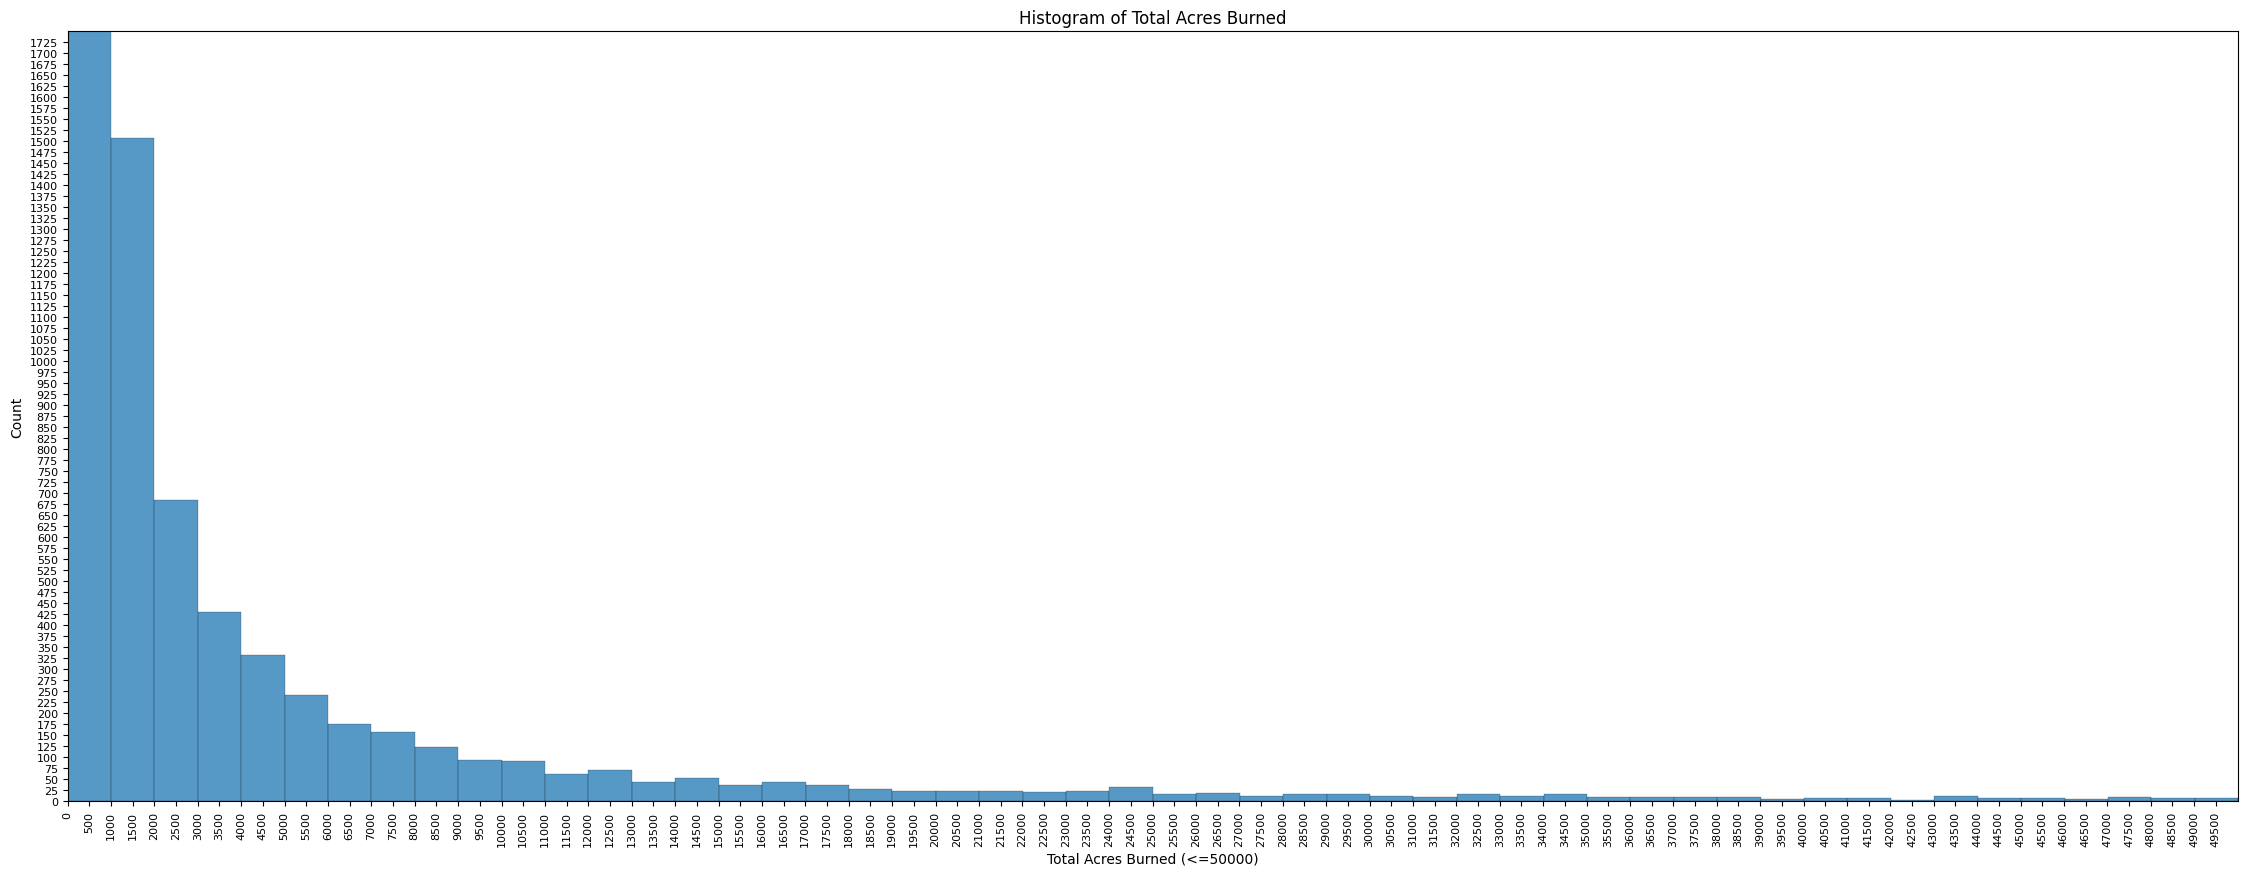

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()

    # Histogram with limited axes
    plt.figure(figsize=(28, 10))
    us_fires_copy = us_fires_copy[us_fires_copy['TOTALACRES'] >= 0]
    sns.histplot(us_fires_copy, x='TOTALACRES', bins=1000, binwidth=1000)
    plt.title('Histogram of Total Acres Burned')
    plt.xlabel('Total Acres Burned (<=50000)')
    plt.ylim(0, 1750)  # Set y-axis limit to 1750
    plt.xlim(0, 50000)  # Set x-axis limit to 50000
    ticks_X = np.arange(0, 50000, 500)
    plt.xticks(ticks_X, rotation=90, fontsize = 8)
    ticks_y = np.arange(0, 1750, 25)
    plt.yticks(ticks_y, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Histogram of Total Acres Burned:**

###This plot shows the distribution of fire sizes (total acres burned).
###The x-axis represents the total acres burned, and the y-axis represents the frequency or count of fires within each size range.
###The distribution might be skewed right, with a higher frequency of smaller fires and a long tail of larger fires.
###The log transformation helps visualize the distribution more clearly when there is a wide range of fire sizes.

---



#**Dataset Single Feature Plots (Density Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates density plot to visualize single features of the dataset:

*   ## Density Plot of Fire Reports Per Year.
*   ## Here we are looking to identify which years had the most reported fires in the US.



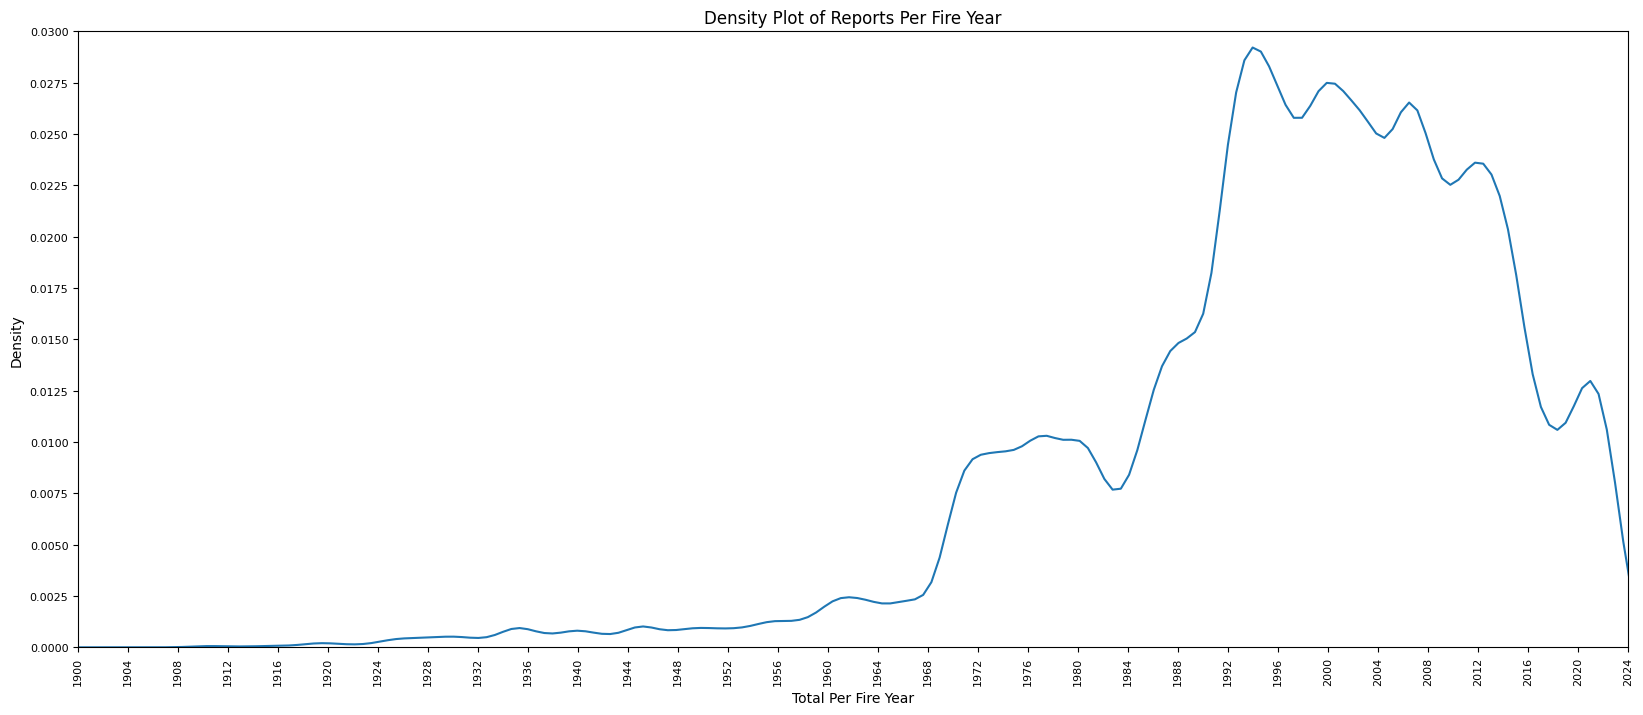

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()

    # Density Plot
    plt.figure(figsize=(20, 8))
    sns.kdeplot(us_fires_copy, x='FIREYEAR')
    plt.title('Density Plot of Reports Per Fire Year')
    plt.xlabel('Total Per Fire Year')
    plt.ylim(0.000, 0.030)  # Set y-axis limit to 0.030
    plt.xlim(1900, 2024)  # Set x-axis limit to 2024
    ticks_X = np.arange(1900, 2025, 4)
    plt.xticks(ticks_X, rotation=90, fontsize = 8)
    ticks_y = np.arange(0.000, 0.031, .0025)
    plt.yticks(ticks_y, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Density Plot of Fire Reports Per Year:**

###This plot provides a smoothed representation of a left skewed reported fire occurence from 1900 to 2024.
###The x-axis represents the years of reported fires, and the y-axis represents the density of reported fires.
###The biggest cluster of years with fire reports is between 1984 and 2024.

---



#**Dataset Single Feature Plots (Count Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates count plot to visualize single features of the dataset:
* ## Count Plot of Fire Causes (using a custom color palette)
* ## We are trying to highlight the huge difference between differnet catagories to better inform people about the huge gap between fires listed as wildfires and every other categories. As a way to learn more about reported US fires.

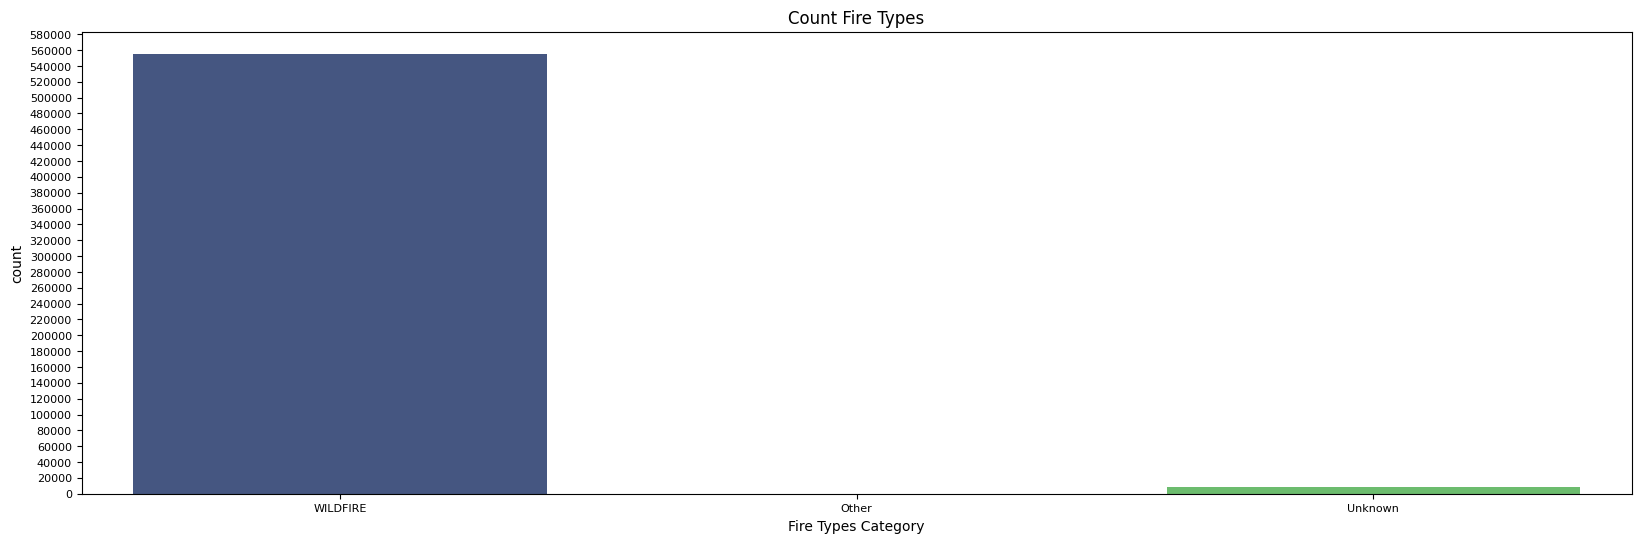

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()

    # Count Plot for FIRETYPECATEGORY with custom color palette
    us_fires_copy2 = us_fires.copy()
    us_fires_copy2.loc[~us_fires_copy2['FIRETYPECATEGORY'].isin(['Unknown', 'WILDFIRE']), 'FIRETYPECATEGORY'] = 'Other'
    plt.figure(figsize=(20, 6))
    sns.countplot(data=us_fires_copy2, x='FIRETYPECATEGORY', hue='FIRETYPECATEGORY', palette='viridis', dodge=False, legend=False)
    plt.title('Count Fire Types')
    plt.xlabel('Fire Types Category')
    plt.xticks(fontsize = 8)
    ticks_y = np.arange(0, 600000, 20000)
    plt.yticks(ticks_y, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Count Plot of Fire Causes:**

###This plot shows the frequency of different fire types.
###The x-axis represents the various types of fires (e.g., Wildfires, Unknown, and others (FIRE WEATHER, FIRE ACTIVITY, PRESCRIBED FIRE, etc.)), and the y-axis represents the count or frequency of the reported types of fires.
###It helps identify the most common and least common fire types in the dataset.
###Overall, there is a clear larger category than any other category and that is the widefire category. The wildfire catagory has nearly 560000 reports while in second place the Unknown category has almost 20000, while any other type of fire is not visible do to the low amount of reports.


---



#**Dataset Single Feature Plots (Box Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates box plot to visualize single features of the dataset:
* ## Box Plot of Latitude Range Values.
* ## Here we are trying to identify which latitude has the most frequent amounts of fire reports.

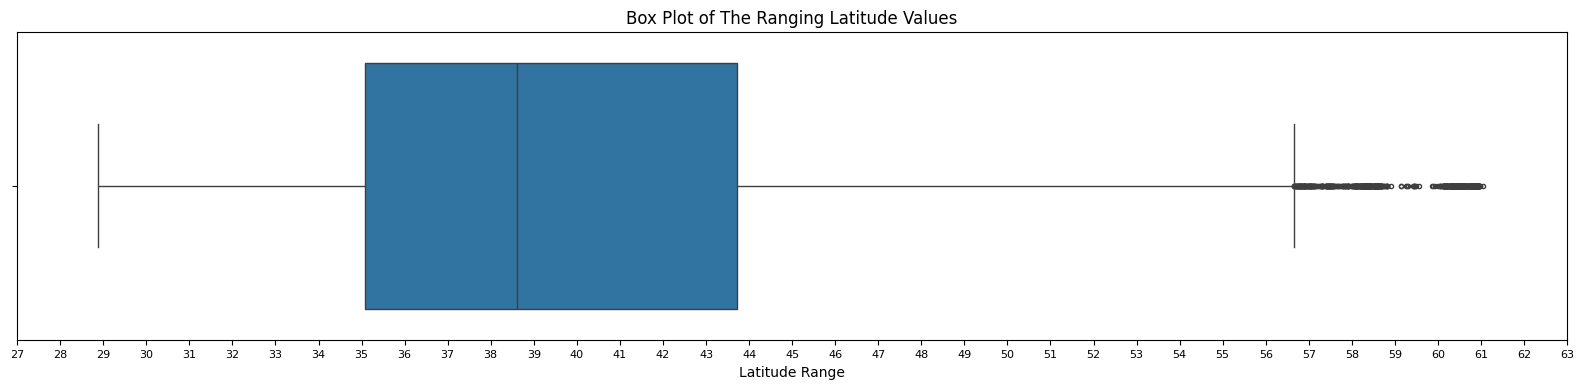

In [ ]:
def create_single_feature_plots(us_fires):

    # Box Plot
    plt.figure(figsize=(20, 4))
    marker_size = dict(markersize=3)
    sns.boxplot(us_fires, x='LATITUDE', flierprops=marker_size)
    plt.title('Box Plot of The Ranging Latitude Values')
    plt.xlabel('Latitude Range')
    plt.xlim(27, 63)
    ticks_x = np.arange(27, 64, 1)
    plt.xticks(ticks_x, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Box Plot of The Ranging Latitude Values:**

###This plot displays the distribution of latitude locations of reported US fires using a box-and-whisker representation.
###The box represents the interquartile range (IQR), which contains the middle 50% of the data as between the 38 and 39 latitudes.
###The whiskers extend to the minimum of about 29 latitude and maximum of between 56 and 57 latitude values.
###Outliers are plotted as individual points beyond the whiskers right of the maximum value.
###The first quartile starts a bit after the 35 latitude and the 3rd quartile is just before the 44 latitude.

---



#**Dataset Single Feature Plots (Violin Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates violin plot to visualize single features of the dataset, including:
* ## Violin Plot of Longitude Range Values
* ## Here we are trying to identify which longitude has the most frequent amounts of fire reports.

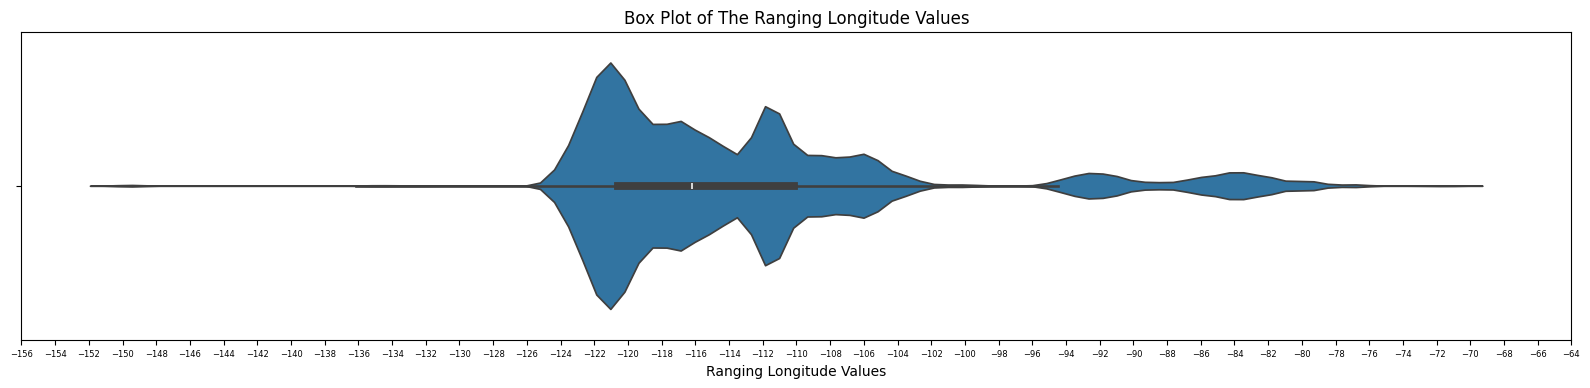

In [ ]:
def create_single_feature_plots(us_fires):

    # Violin Plot
    plt.figure(figsize=(20, 4))
    sns.violinplot(us_fires, x='LONGITUDE')
    plt.title('Box Plot of The Ranging Longitude Values')
    plt.xlabel('Ranging Longitude Values')
    plt.xlim(-156, -64)
    ticks_x = np.arange(-156, -63, 2)
    plt.xticks(ticks_x, fontsize = 6)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Box Plot of The Ranging Longitude Values:**

###This plots median is at about -116 longitude.
###The highest Density is between -126 and -101 longitudes with it's largest peak being at -121 longitude.
###It's maximum is about -152 longitude and its minimum is about -69 longitude.
###The first quartile is located between -121 and -120 longitude and the third quartile is locateded at -110 longitude.

---



#**Dataset Two Feature PlotS (Scatter Plot)**

## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between 'TOTALACRES' (total acres burned >=1000), 'FIREYEAR' (1984-2024 fire years), and 'STATE' (fire locations in US states).
## The function uses a scatter plot to showcase these relationships.
## This visualization is to help represent the highest years reported US fires as well as identify the states that had reported fires of >= 1000 acres of fire damage land.
## We are looking to visualize the states with the highest acres of damage do to fires between 1984-2024.

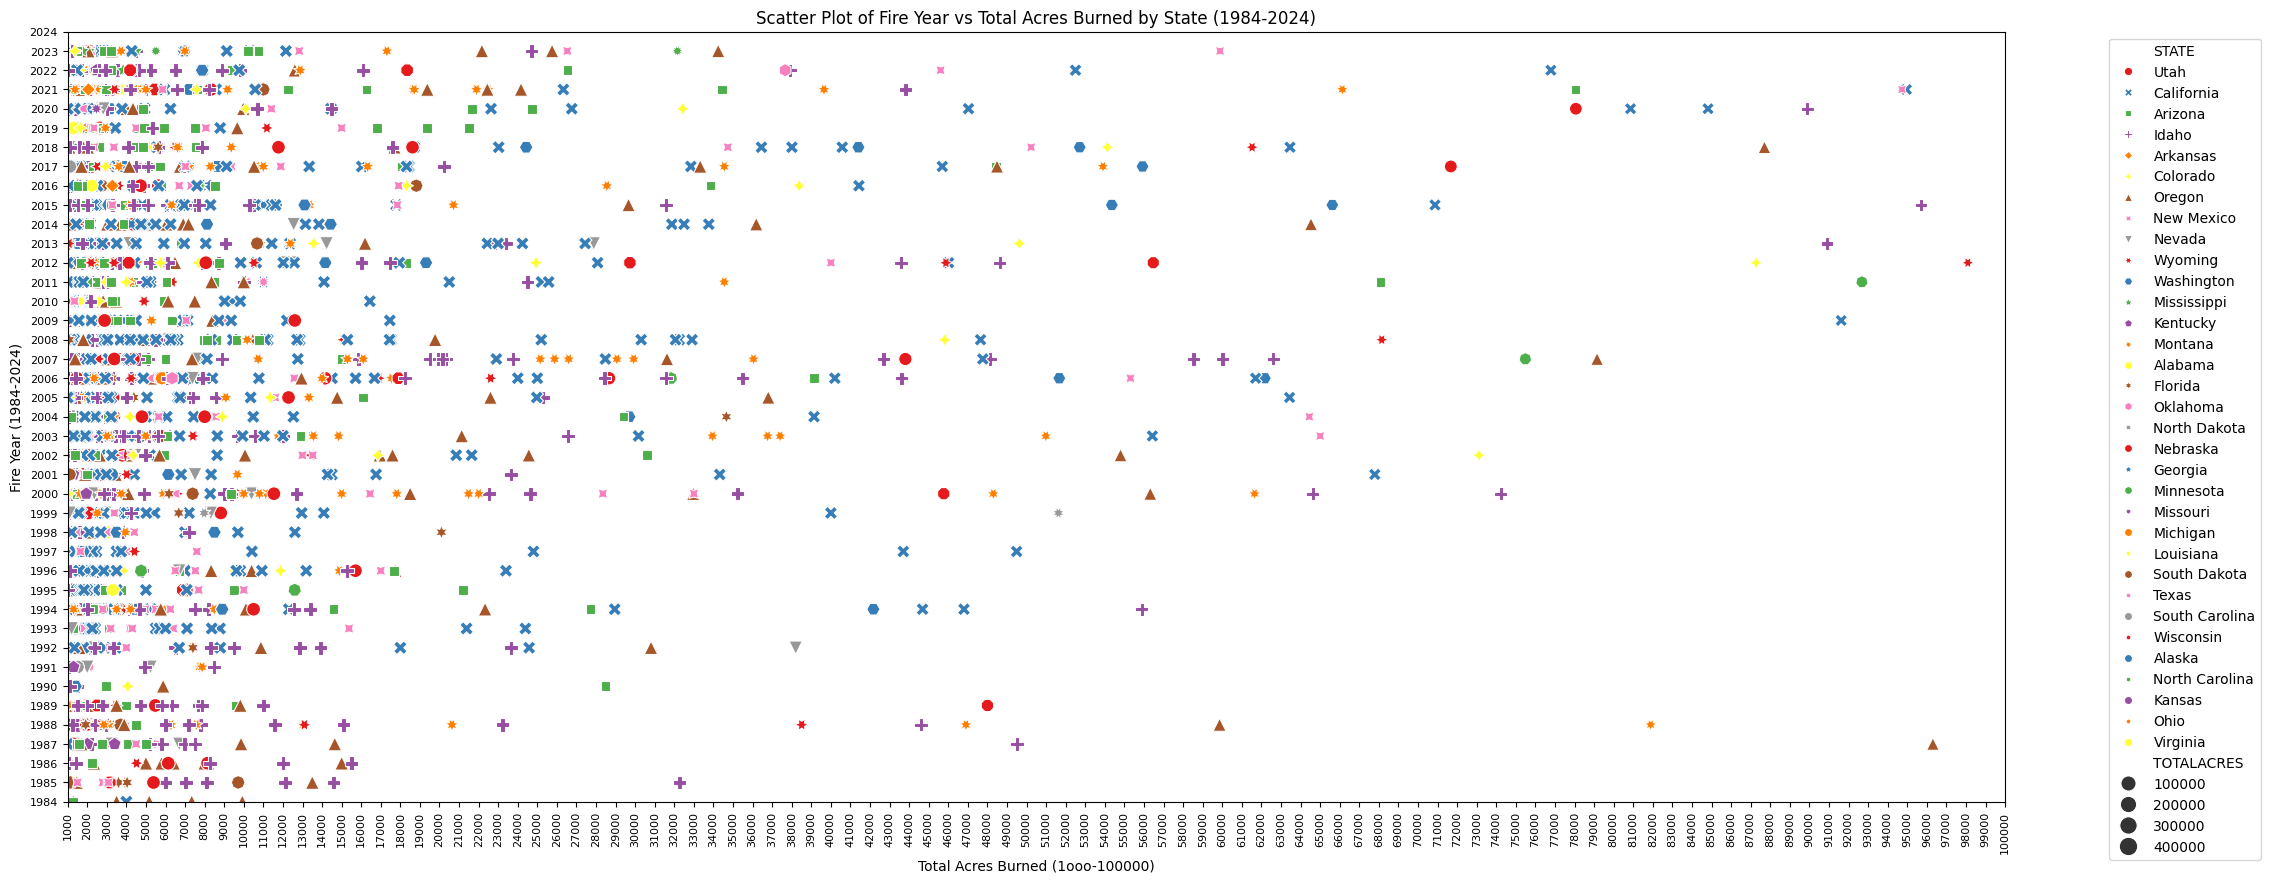

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):
  # Filter the DataFrame for years 1984 to 2024
  filtered_us_fires = us_fires.copy()
  filtered_us_fires = filtered_us_fires[(filtered_us_fires['FIREYEAR'] >= 1984) & (filtered_us_fires['FIREYEAR'] <= 2024)]
  filtered_us_fires = filtered_us_fires[(filtered_us_fires['TOTALACRES'] >= 1000)]

  # Take a random sample of 2000 data points
  sample_us_fires = filtered_us_fires.sample(n=2000)

  # Create the scatter plot with the filtered DataFrame
  plt.figure(figsize=(25, 10))
  sns.scatterplot(data=sample_us_fires, x='TOTALACRES', y='FIREYEAR', hue='STATE', style='STATE', size='TOTALACRES', sizes=(100, 5), palette='Set1')
  plt.title('Scatter Plot of Fire Year vs Total Acres Burned by State (1984-2024)')
  plt.xlabel('Total Acres Burned (1ooo-100000)')
  plt.ylabel('Fire Year (1984-2024)')
  plt.ylim(1984, 2024)
  plt.xlim(1000, 100000)
  ticks_X = np.arange(1000, 100001, 1000)
  plt.xticks(ticks_X, rotation=90, fontsize = 8)
  ticks_y = np.arange(1984, 2025, 1)
  plt.yticks(ticks_y, fontsize = 8)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Scatter Plot of Fire Year vs Total Acres Burned by State (1984-2024):**

###This plot shows the relationship between the year of the fire (FIREYEAR) and the total acres burned (TOTALACRES), with different colors and marker styles representing states (STATE).
###**Potential Interpretations**:
###Trends over time: You can observe that the significance of fire size has been increasing with the fire years in the 21st century having more frequent higher counts of fires.
###Impact of fire cause: Different colors and marker styles can reveal if certain causes tend to result in larger or smaller fires with Arizona, Idaho, Alabama, brown, California having the most smallest of acres detroyed frequency. Then Idaho, Utah, California, and Alabama having the biggest of acres detroyed frequency. Finally Arizona, Idaho, Alabama, Utah, California being the most frquent places of large fire frequencies.
###Clusters and outliers: Our clusters are between the years of 2008 to 2016 with reports of 1000 and 20000 acres damaged due to fires with our outliers being between reports of 40000 to 100000 between the years of 1984 and 1989.

---



#**Dataset Two Feature Plots (Swarm Plot)**



## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between 'TOTALACRES' (total acres burned >=1000) and 'COUNTY' (Top 11 US counties with the most fires).
## The time frame is also limited to 1984-2024.
## The function uses a swarm plot and to showcase these relationships.
## This visualization helps identify the counties with >= 70 reports of fires. This will help interpret the risk for the top 11 counties to be indanger of fires.

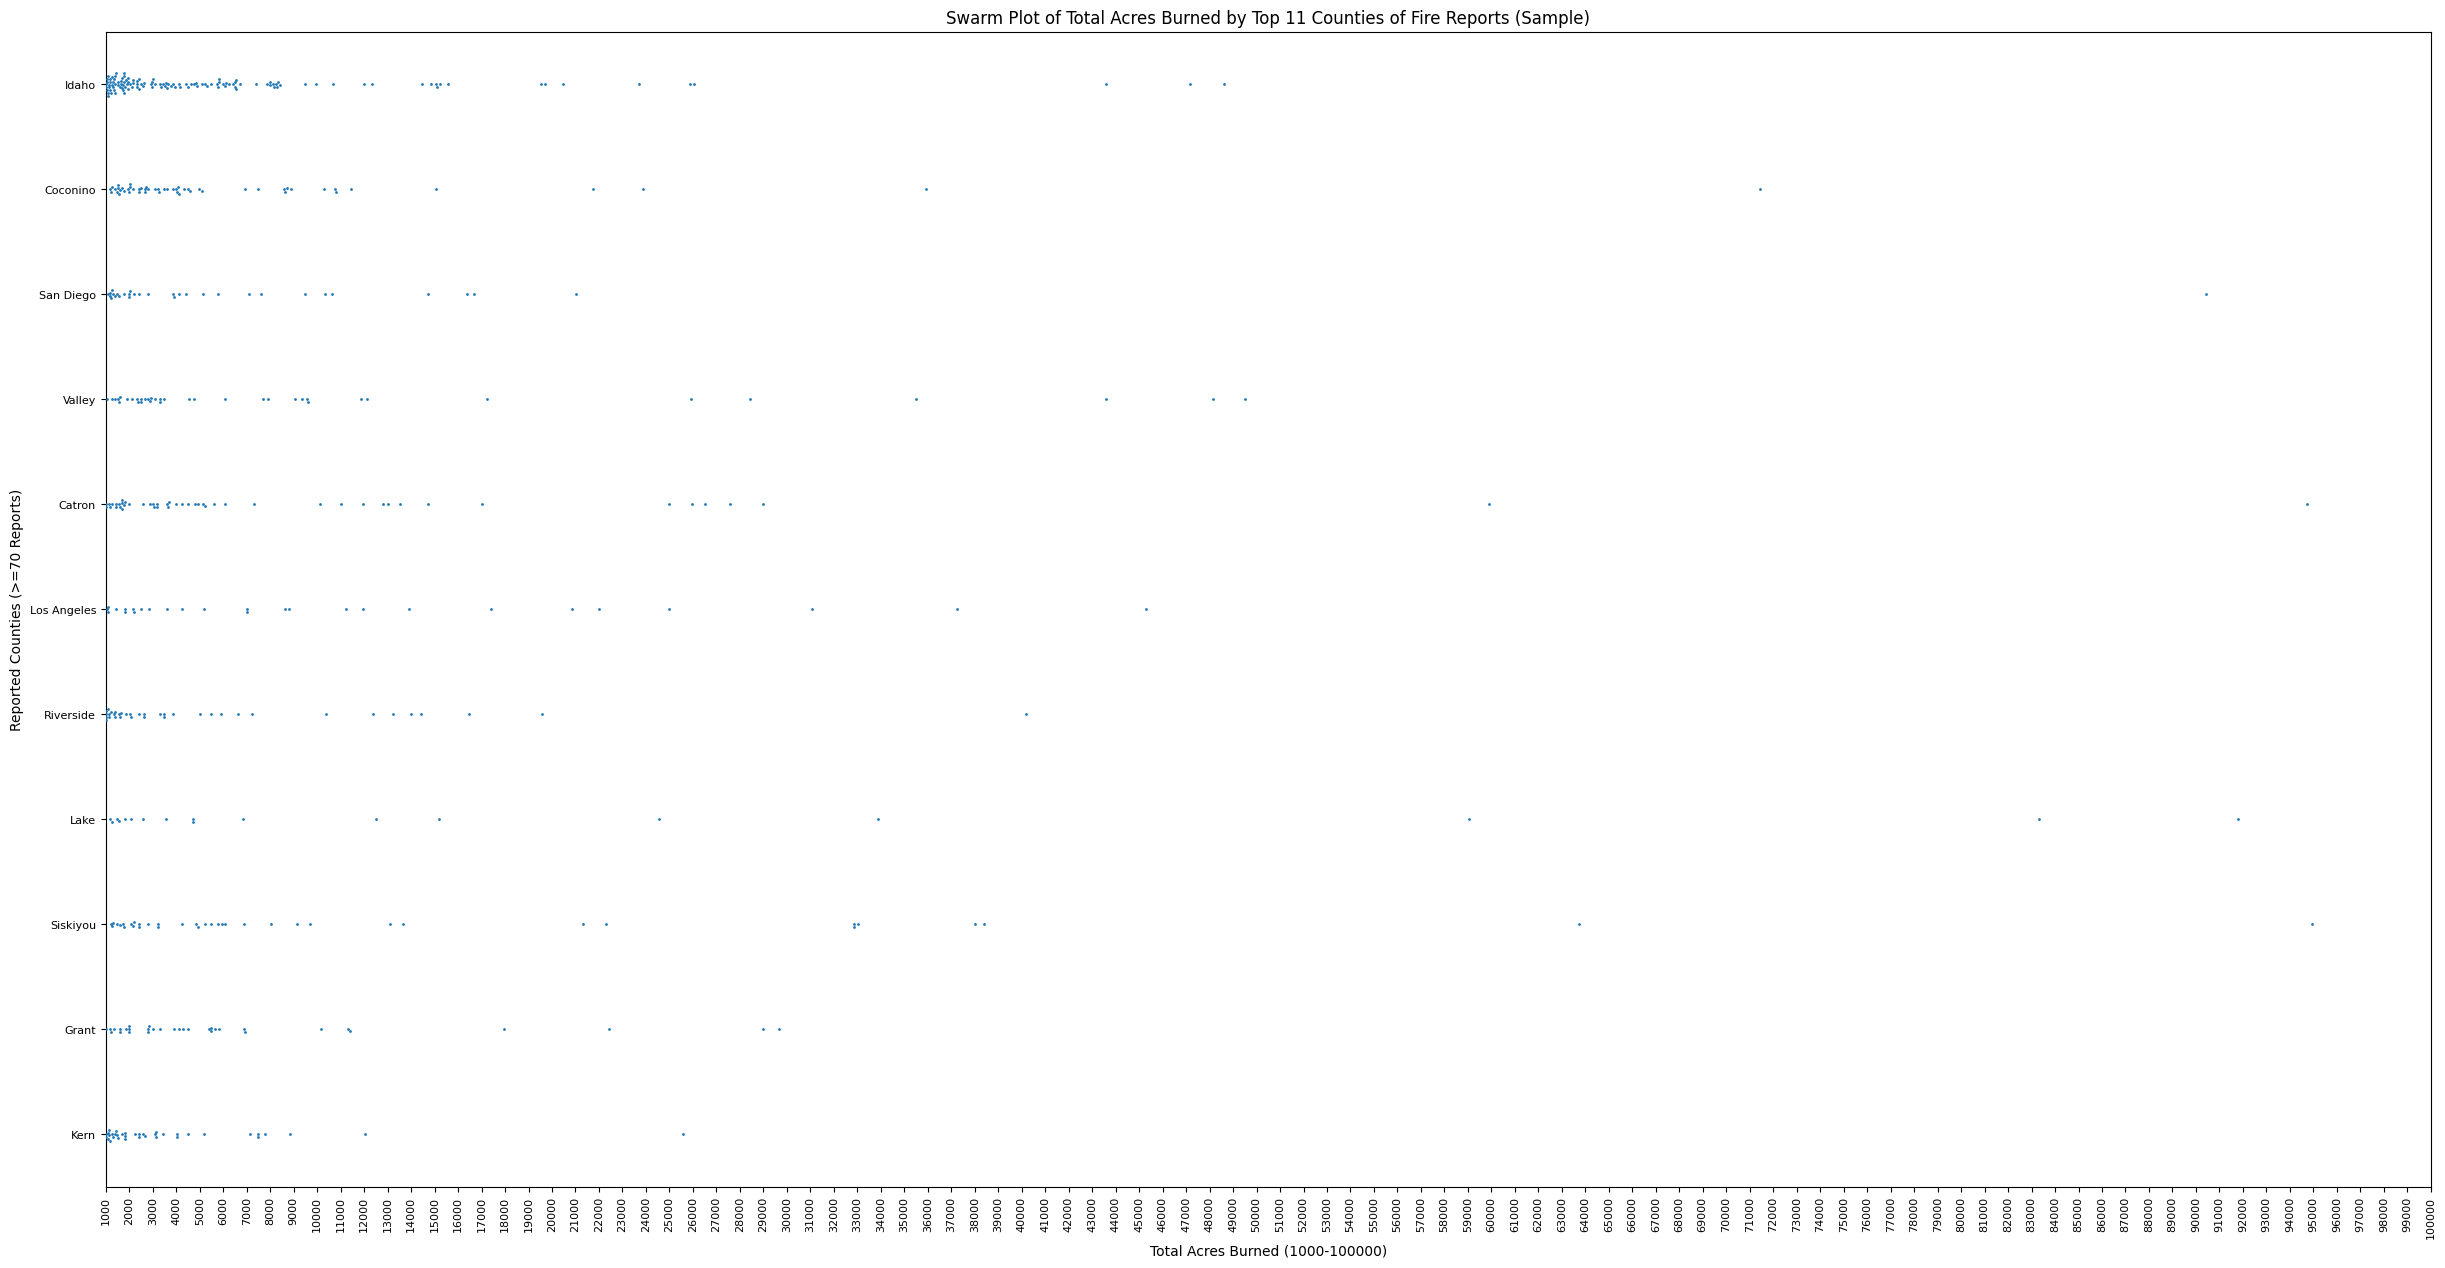

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):
  # Filter the DataFrame for years 1984 to 2024
  filtered_us_fires2 = us_fires.copy()
  filtered_us_fires2 = filtered_us_fires2[(filtered_us_fires2['FIREYEAR'] >= 1984) & (filtered_us_fires2['FIREYEAR'] <= 2024)]
  filtered_us_fires2 = filtered_us_fires2[(filtered_us_fires2['TOTALACRES'] >= 1000)]
  county_counts = filtered_us_fires2['COUNTY'].value_counts()
  frequent_counties = county_counts[county_counts >= 70].index
  filtered_us_fires2 = filtered_us_fires2[filtered_us_fires2['COUNTY'].isin(frequent_counties)]

  # Take a random sample of 500 data points
  sample_us_fires2 = filtered_us_fires2.sample(n=500)

  # Create the swarm plot with the sampled data
  plt.figure(figsize=(30, 15))
  sns.swarmplot(data=sample_us_fires2, x='TOTALACRES', y='COUNTY', size=2)
  plt.xlim(1000, 100000)  # Set x-axis limit to 5
  ticks_X = np.arange(1000, 100001, 1000)
  plt.xticks(ticks_X, rotation=90, fontsize = 8)
  plt.yticks(fontsize = 8)
  plt.title('Swarm Plot of Total Acres Burned by Top 11 Counties of Fire Reports (Sample)')
  plt.xlabel('Total Acres Burned (1000-100000)')
  plt.ylabel('Reported Counties (>=70 Reports)')
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Swarm Plot of Total Acres Burned by Cause of Fire (Sample)**:

###This plot displays the distribution of total acres >= 1000 burned for the top 11 counties in the US, using a categorical scatter plot.

###**Potential Interpretations:**

###Comparison of State: Idaho, Coconino, and Canton tend to have the highest number of reported fires.
###Identification of differences: Idho tends to have the highest total acres destoyed do to fires.
###Clusters and outliers: Our clusters fall between 1000 and 10000 acres damaged due to fires with our outliers being between reports of 40000 to 100000.

---



#**Dataset Two Feature PlotS (Strip Plot)**

## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between 'TOTALACRES' (total acres burned) and 'STATE' (US States with reported fires).
## The function uses a strip plot to showcase these relationships.
## This visualization helps identify the states with the highest frequency of fires. This will help interpret the high risk of fires for certain states.

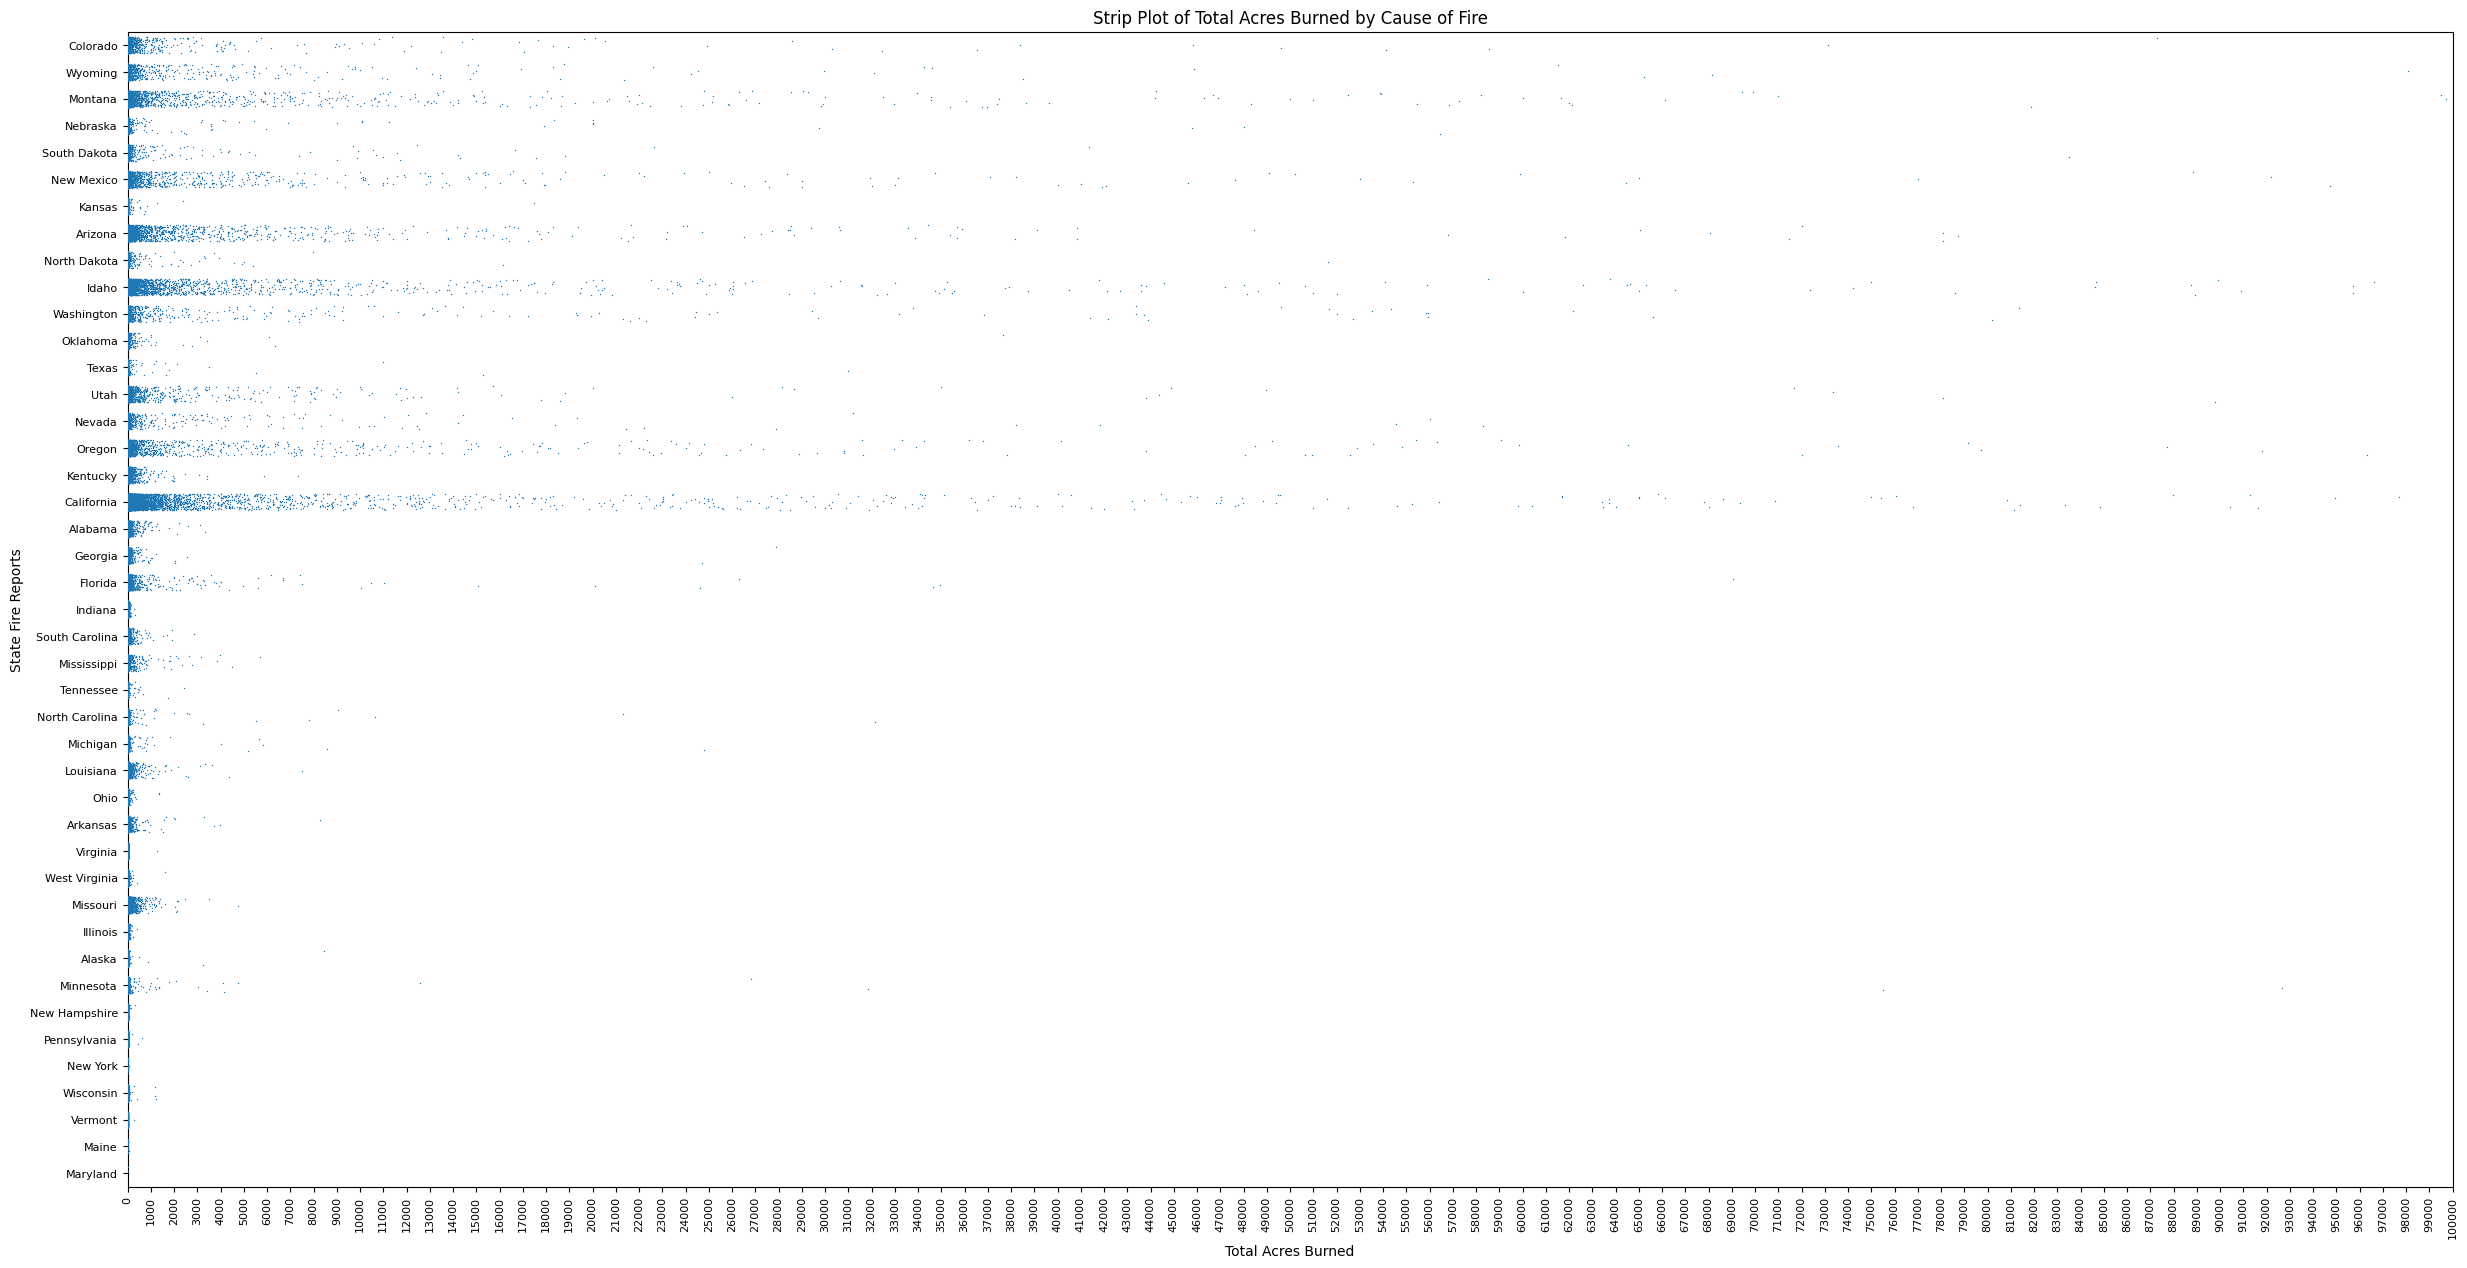

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):

  # Strip Plot of TOTALACRES grouped by STATCAUSE
  plt.figure(figsize=(30, 15))
  sns.stripplot(data=us_fires, x='TOTALACRES', y='STATE', jitter=0.3, size=1)
  plt.xlim(0, 100000)  # Set x-axis limit to 5
  ticks_X = np.arange(0, 100001, 1000)
  plt.xticks(ticks_X, rotation=90, fontsize = 8)
  plt.yticks(fontsize = 8)
  plt.title('Strip Plot of Total Acres Burned by State')
  plt.xlabel('Total Acres Burned')
  plt.ylabel('State Fire Reports')
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Strip Plot of Total Acres Burned by State:**

###This plot is similar to the swarm plot but presents the data points along a single axis (x-axis in this case).

###**Potential Interpretations:**

###The states with the highest freuence of reported fires are California, Idaho, Arizona, New Mexico, and Montana with each of these states having the lowest and largest acres of fire damage.
###Cluster and Outlier detection: The cluster are between 0 and 6000 with outliers being above 800000 acres of damage.

---



#**Overall Interpretation:**

###By analyzing these two-feature plots together, you can gain a deeper understanding of the relationships between fire year, total acres burned, states, counties.

###Patterns and Trends: California seems to be a big place effected by a tone of wild fires.

###Correlations: Correlations include the fact that all the clusters are at the beginning of the graph With the outliers being about 40000.
###Influencing Factors: The most effect place seem to be mostly on the west coast or the center of the US.

---



#**Dataset summary (Dataframe Dimensions)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the dataset's shape.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

##With this Dataframe Dimension we can get the overal shape of our dataset.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    print("Dataset Shape:", us_fires.shape)

display_dataset_summary(us_fires)

Dataset Shape: (564191, 9)


##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Shape:**

###This indicates the number of rows (observations) and columns (features) in the dataset.
###**Interpretation:**
###We have a large dataset with only 9 unique colums but over 564191 rows of information.

---



#**Dataset summary (Dataframe Info)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the data types.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

##With this Dataframe info we can get a more indepth understanding of the mechanics that each row works with.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    print("\nDataset Info:")
    print(us_fires.info())

display_dataset_summary(us_fires)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 564191 entries, 0 to 672027
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LATITUDE          564191 non-null  float64
 1   LONGITUDE         564191 non-null  float64
 2   COUNTY            564191 non-null  object 
 3   FIREYEAR          564191 non-null  int64  
 4   SIZECLASS         564191 non-null  object 
 5   TOTALACRES        564191 non-null  float64
 6   STATCAUSE         564191 non-null  object 
 7   FIRETYPECATEGORY  564191 non-null  object 
 8   STATE             564191 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 43.0+ MB
None


##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Info:**

###This shows the data types of each column and the number of non-null values.
###**Interpretation:**
###Data types: Our data type include 3 float64 values, 1 int64 value, and 5 object values.
###Non-null values: The number of Non-Null's is equal to the total entries.

---



#**Dataset summary (Statistics Summary)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the descriptive statistics for numerical features, and frequency counts for categorical features.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

## With this information we can now interpret the highest and lowest values from each column.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    for col in us_fires.select_dtypes(include=['object']).columns:
        print(f'\n{us_fires[col].value_counts()}')  # Frequency of each category

display_dataset_summary(us_fires)


COUNTY
Coconino      37349
Riverside     18781
Lake          11611
Grant         11553
Idaho         11182
              ...  
Fulton            1
Cullman           1
Holmes            1
Tallapoosa        1
Bingham           1
Name: count, Length: 799, dtype: int64

SIZECLASS
A          337271
B          174073
C           34086
D            6750
E            4171
F            3018
Unknown      2867
H             898
G             798
I             156
J             101
K               2
Name: count, dtype: int64

STATCAUSE
Lightning               217333
Undetermined             93997
Camping                  53422
Equipment                47307
Incendiary               38881
Unknown                  36666
Debris/Open Burning      27233
Other Human Cause        25679
Smoking                  16635
Other Natural Cause       2753
Railroad                  2711
Human                      698
Miscellaneous              306
Utilities                  147
Firearms/Weapons           129
Debr

##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Description (Numeric Columns):**

###This provides descriptive statistics for numerical features, including measures like mean, standard deviation, minimum, maximum, and quartiles.
###Interpretation:
###Central tendency: Mean and median provide insights into the typical or average values of a feature.
###Spread: Standard deviation and quartiles indicate the variability or dispersion of the data around the central tendency.
###Range: Minimum and maximum values show the extent of the data's range.
###**Dataset Description (Categorical Columns):**

###This shows frequency counts for categorical features, providing the count of each unique category within categorical columns.

###**Interpretation:**
###Category prevalence: Frequency counts reveal the most and least common categories within a feature.
###Distribution: You can assess the overall distribution of categories and identify potential imbalances or skewness.


---



#**Dataset Relationship Visualization (Histograms)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates various histogram plots to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
## With these histograms we hope to find a relationship between these clusterd together graphs.

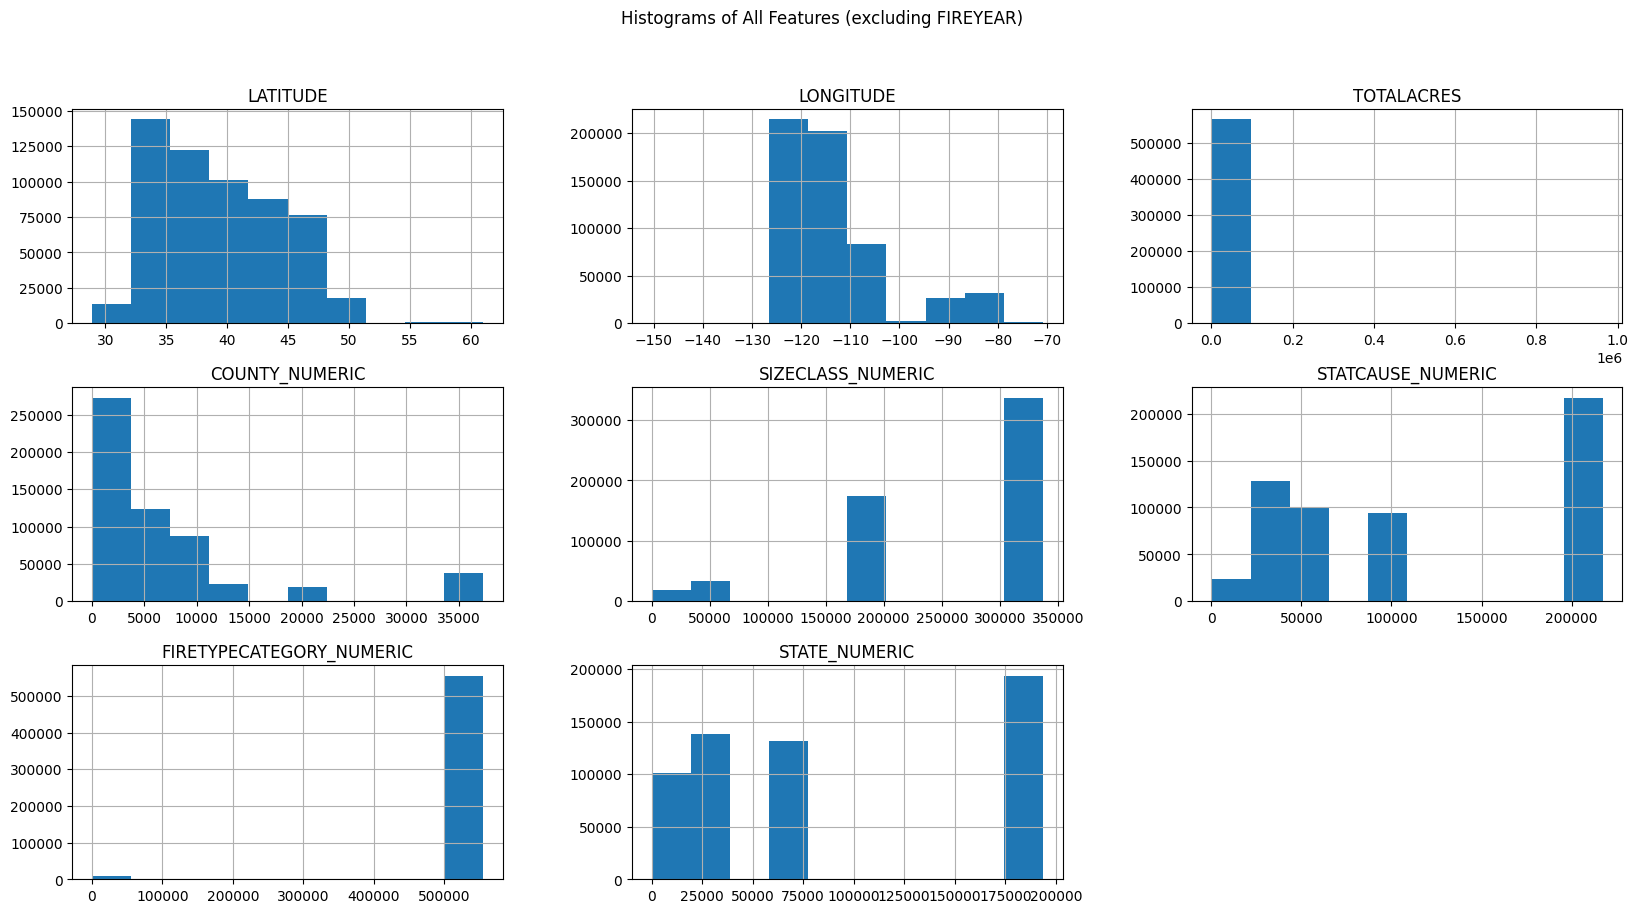

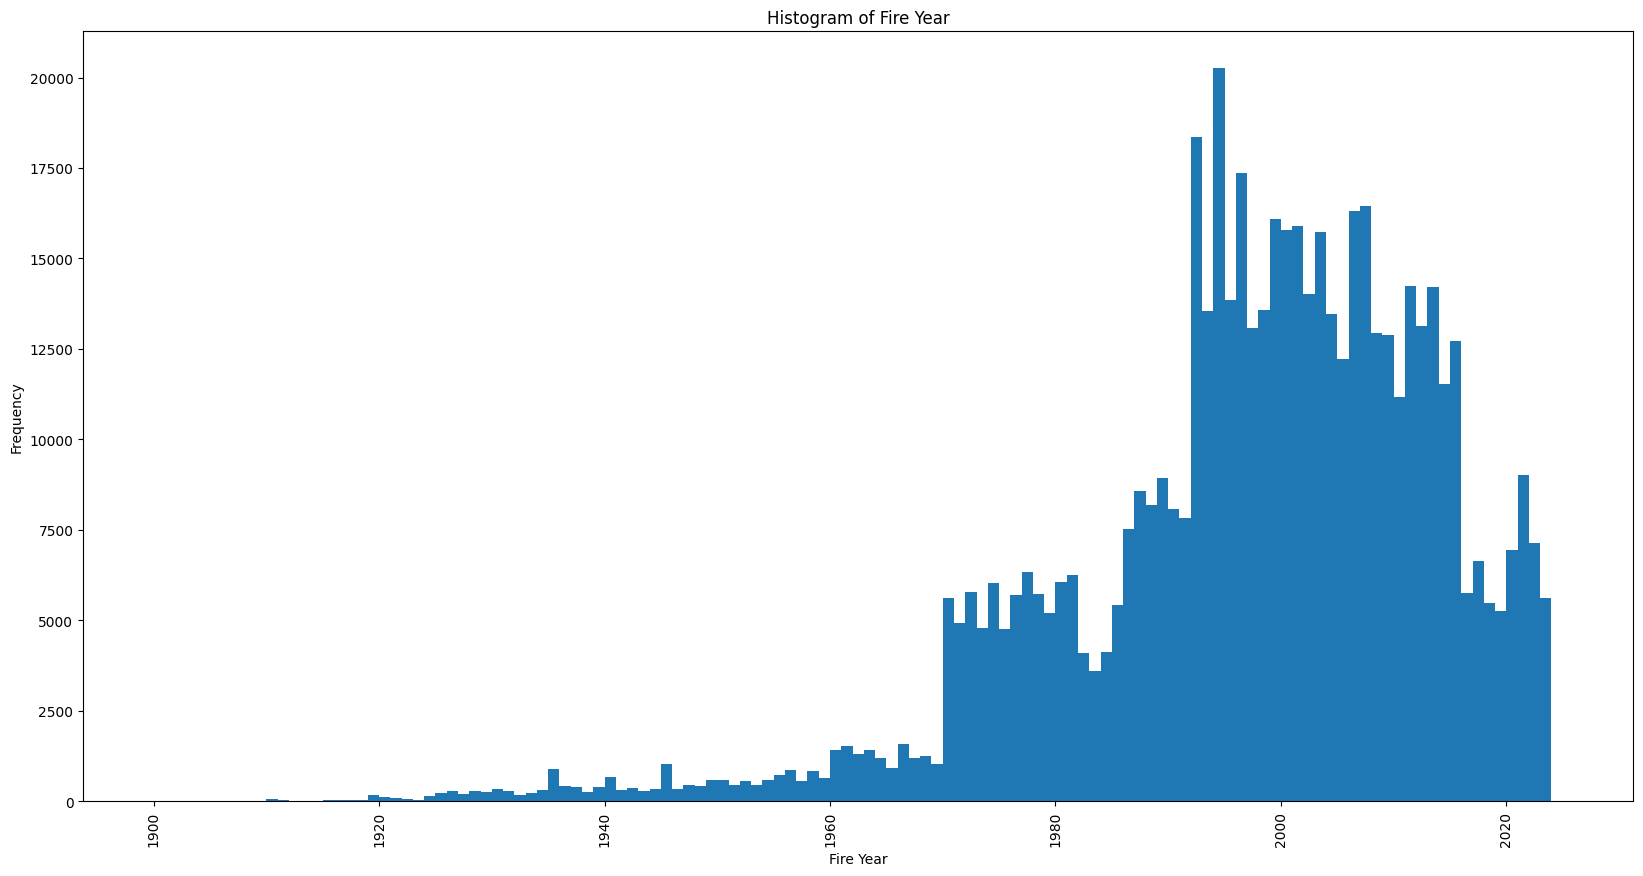

In [ ]:
def relationship_visualization(sample_us_fires):

    converted_us_fires2 = us_fires.copy()

    # Histograms for Each Feature (modified for FIREYEAR)
    numerical_cols = converted_us_fires2.select_dtypes(include=np.number).columns.tolist()

    # Remove FIREYEAR from the list of numerical columns to treat it separately
    numerical_cols.remove('FIREYEAR')

    for col in converted_us_fires2.select_dtypes(include='object').columns:
      converted_us_fires2[f'{col}_NUMERIC'] = converted_us_fires2[col].map(converted_us_fires2[col].value_counts())

    numerical_cols.extend([f'{col}_NUMERIC' for col in converted_us_fires2.select_dtypes(include='object').columns])

    # Create histograms for numerical features (excluding FIREYEAR)
    converted_us_fires2[numerical_cols].hist(figsize=(20, 10))
    plt.suptitle('Histograms of All Features (excluding FIREYEAR)')
    plt.show()

    # Create a separate histogram for FIREYEAR with appropriate bins
    plt.figure(figsize=(20, 10))
    plt.hist(us_fires['FIREYEAR'], bins=range(int(us_fires['FIREYEAR'].min()), int(us_fires['FIREYEAR'].max()) + 2, 1))  # Bins for each year
    plt.title('Histogram of Fire Year')
    plt.xlabel('Fire Year')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Histograms**:

###Distribution of Features: Histograms show the frequency distribution of each numerical feature. You can observe the shape of the distribution (e.g., normal, skewed), identify potential outliers, and gain insights into the central tendency and spread of the data.
###Example: A histogram of TOTALACRES might reveal a skewed distribution with a long tail, indicating that most fires are relatively small, but there are a few very large fires.

---



#**Dataset Relationship Visualization (Box Plots)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates various box plots to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
##With these graphs we are able to find a more descriptive version of our data types through their min, max, medium, 1st, and 3rd quartiles

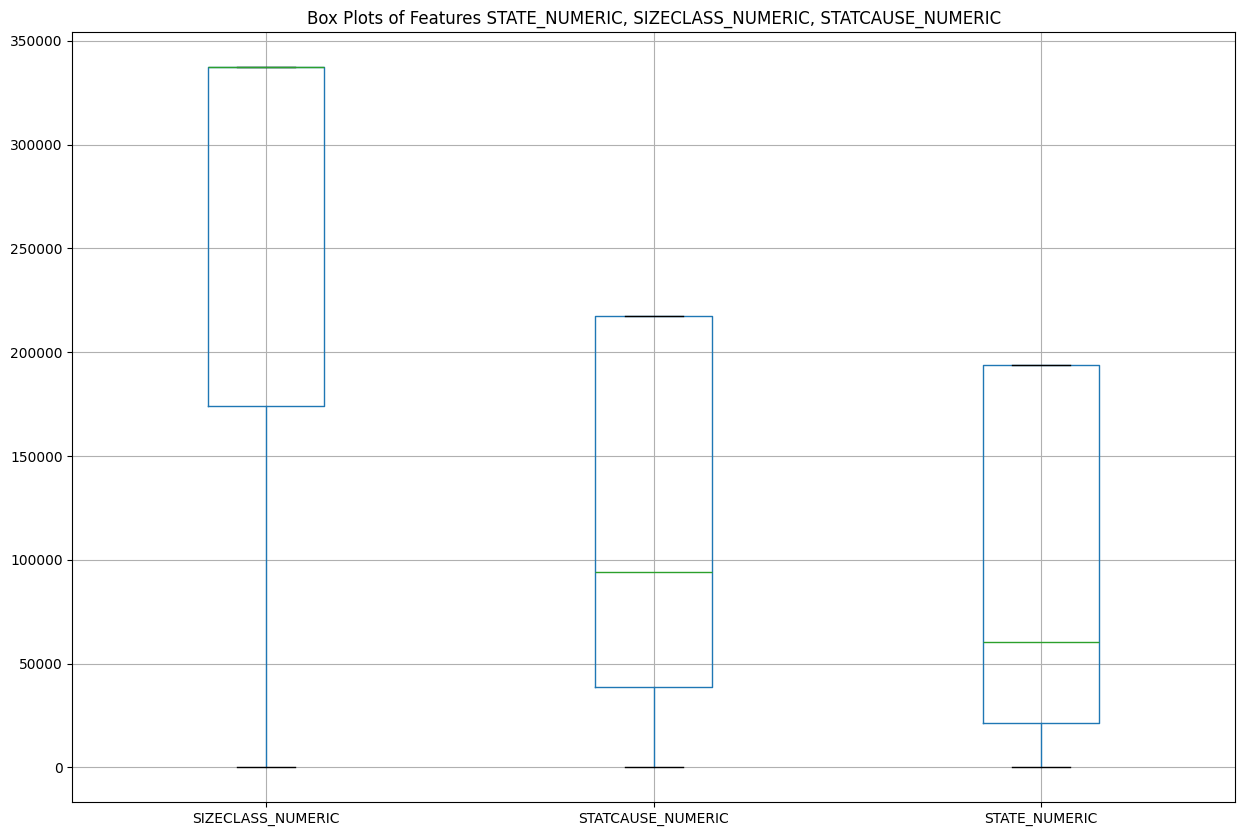

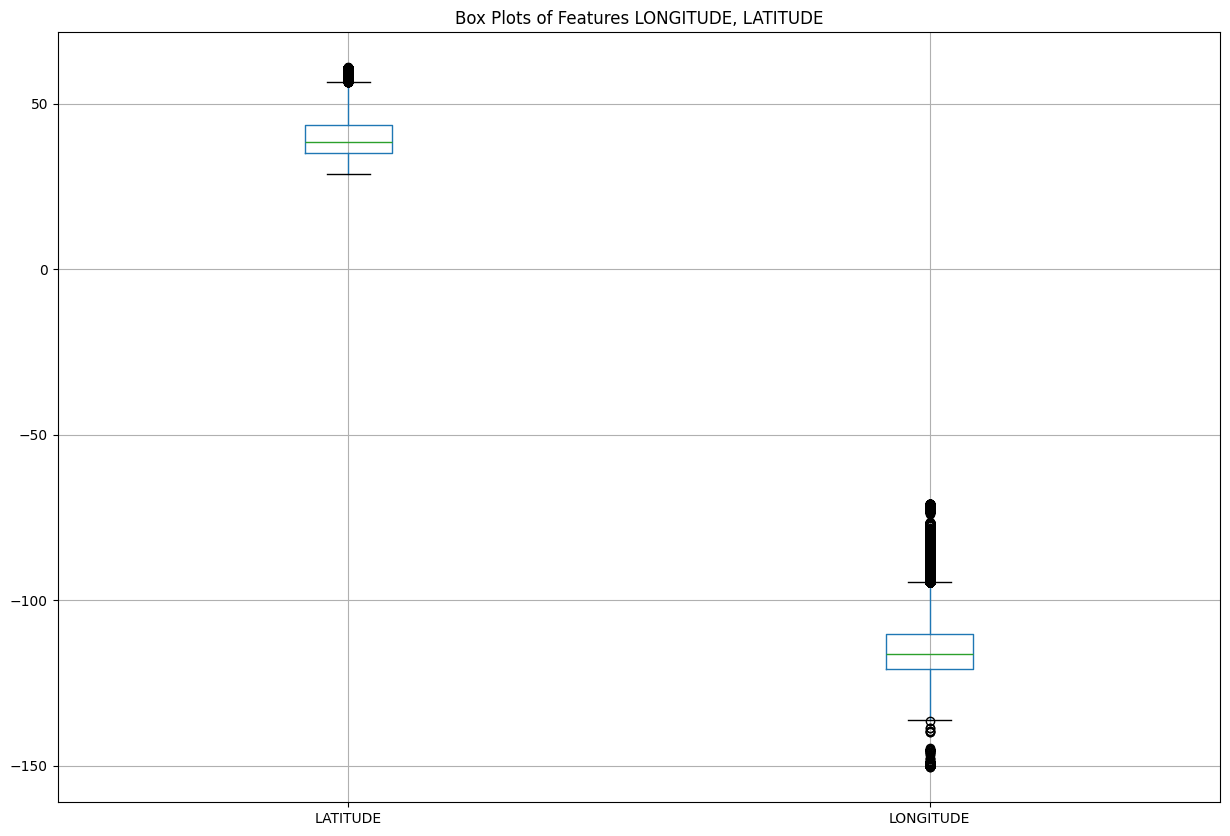

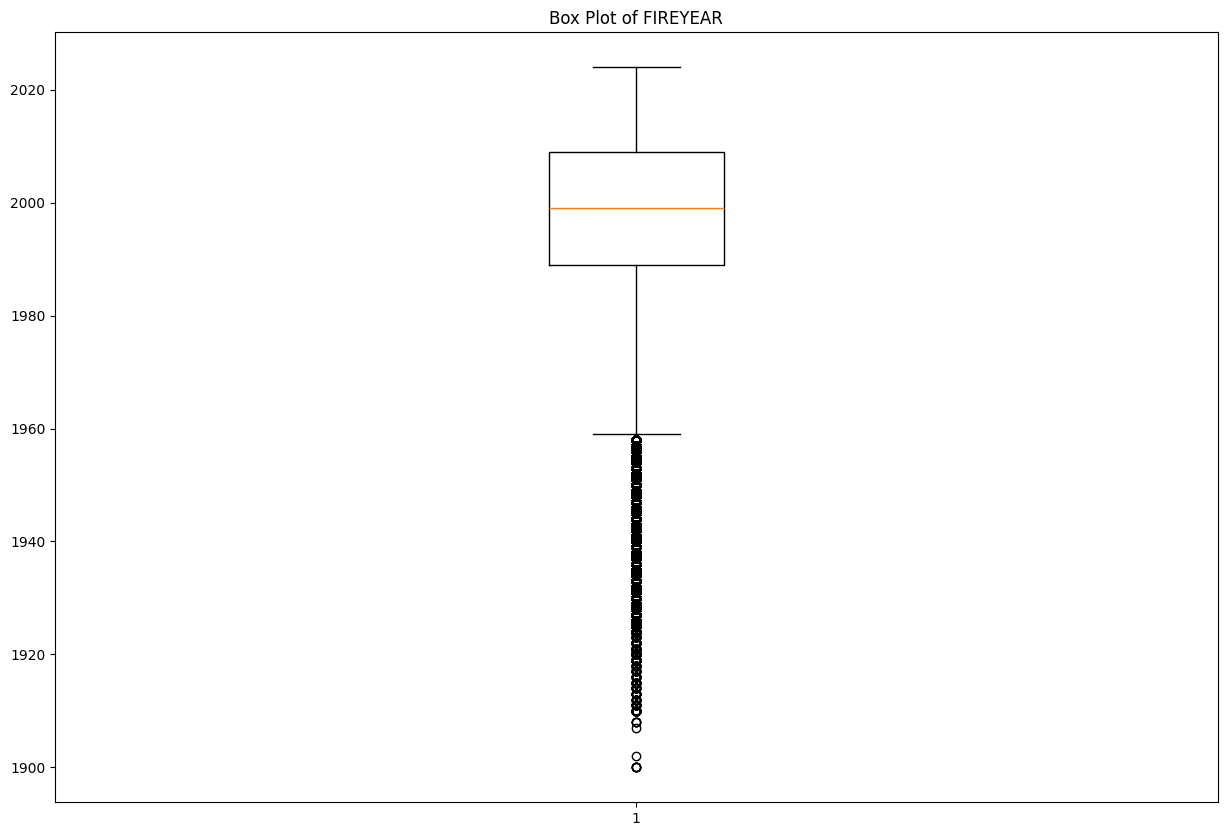

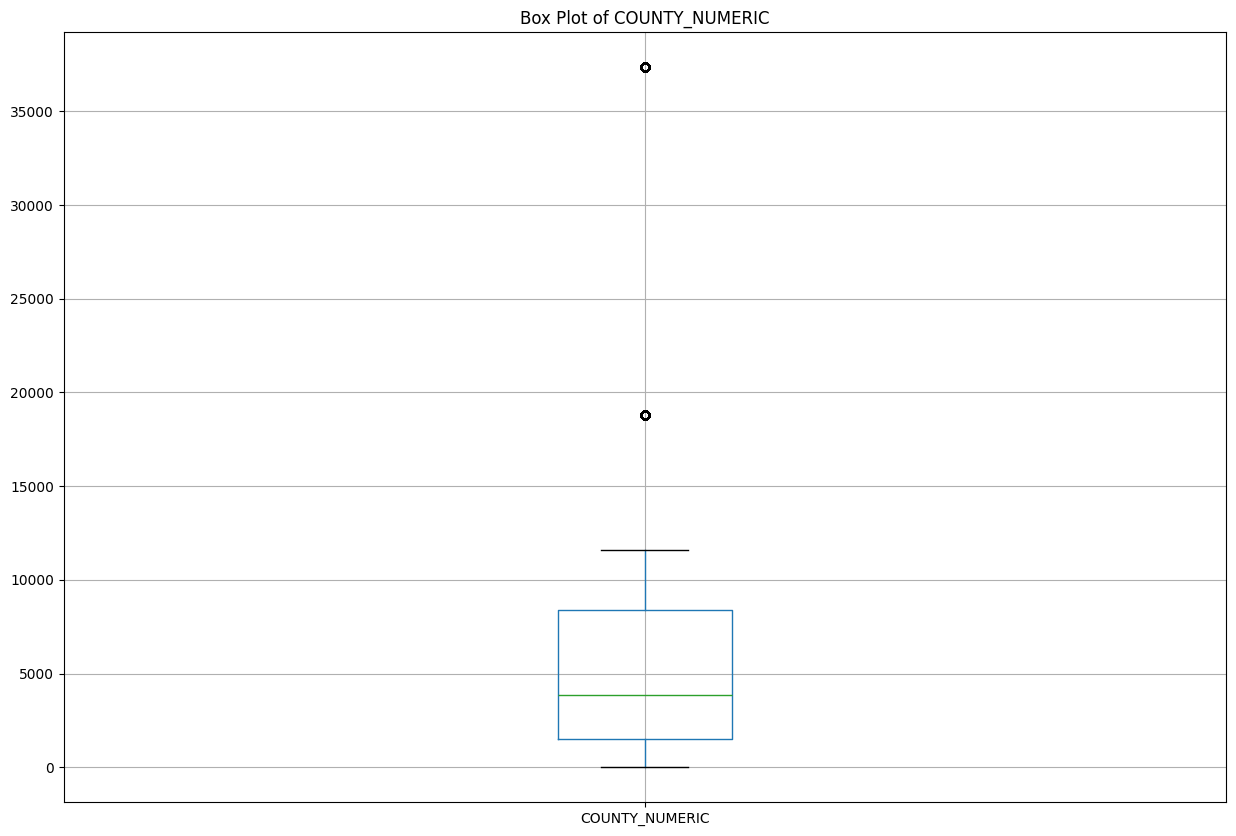

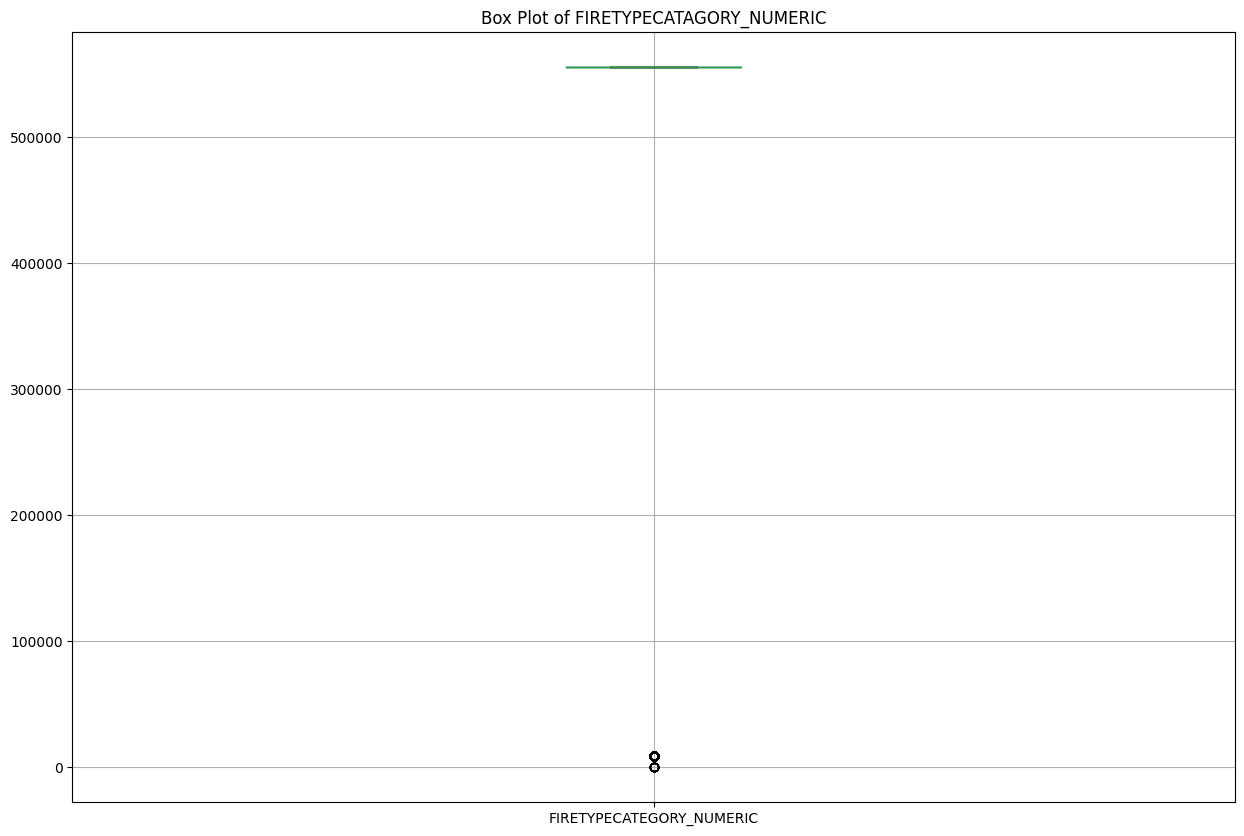

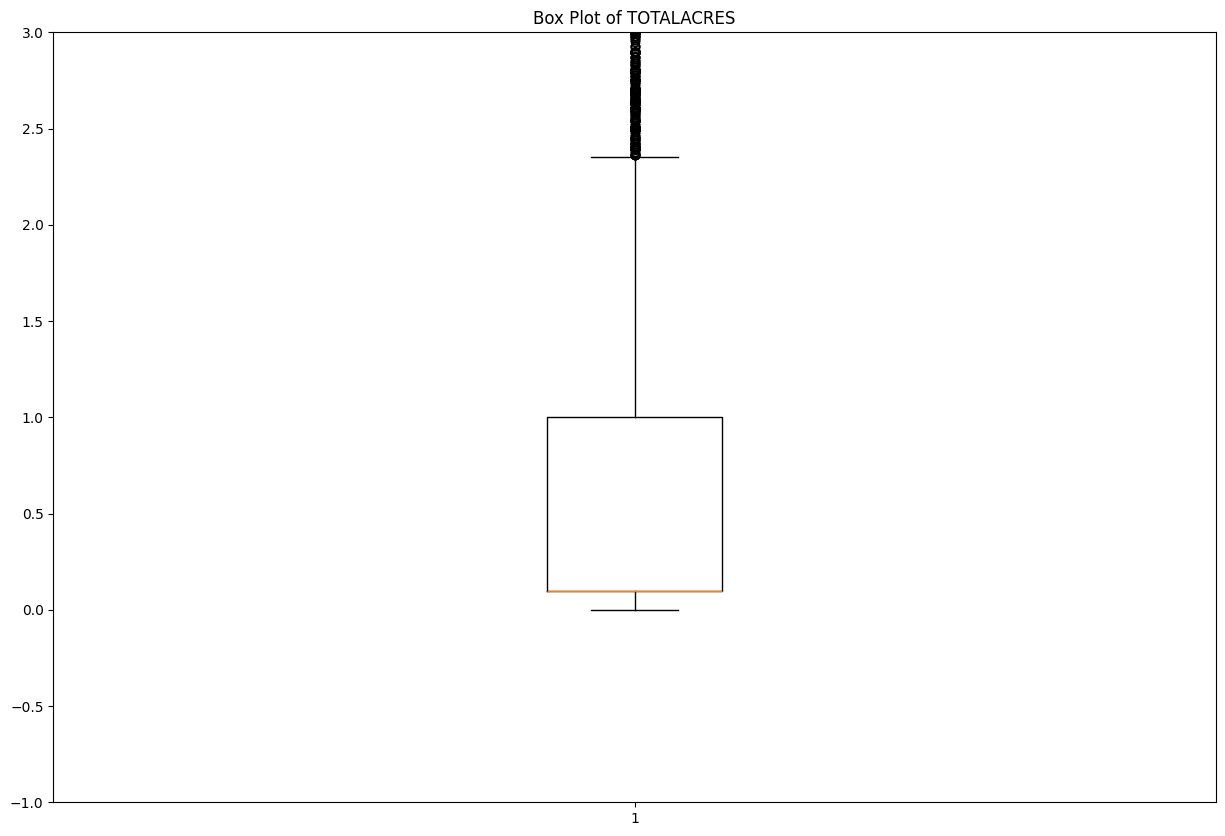

In [ ]:
def relationship_visualization(sample_us_fires):

    converted_us_fires3 = us_fires.copy()

    # Histograms for Each Feature (modified for FIREYEAR)
    numerical_cols1 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols2 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols3 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols4 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()

    for col in converted_us_fires3.select_dtypes(include='object').columns:
      converted_us_fires3[f'{col}_NUMERIC'] = converted_us_fires3[col].map(converted_us_fires3[col].value_counts())

    numerical_cols1.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols2.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols3.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols4.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])

    boxplot1 = numerical_cols1
    boxplot2 = numerical_cols2
    boxplot3 = numerical_cols3
    boxplot4 = numerical_cols4

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC' from the list of numerical columns to treat it separately
    boxplot1.remove('TOTALACRES')
    boxplot1.remove('LATITUDE')
    boxplot1.remove('LONGITUDE')
    boxplot1.remove('FIREYEAR')
    boxplot1.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot1.remove('COUNTY_NUMERIC')

    # Box Plots forFeatures STATE_NUMERIC, SIZECLASS_NUMERIC, STATCAUSE_NUMERIC
    converted_us_fires3[boxplot1].boxplot(figsize=(15, 10))
    plt.title('Box Plots of Features STATE_NUMERIC, SIZECLASS_NUMERIC, STATCAUSE_NUMERIC')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', 'FIREYEAR'
    boxplot2.remove('TOTALACRES')
    boxplot2.remove('COUNTY_NUMERIC')
    boxplot2.remove('STATE_NUMERIC')
    boxplot2.remove('STATCAUSE_NUMERIC')
    boxplot2.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot2.remove('SIZECLASS_NUMERIC')
    boxplot2.remove('FIREYEAR')

    # Box Plots forFeatures LONGITUDE, LATITUDE
    converted_us_fires3[boxplot2].boxplot(figsize=(15, 10))
    plt.title('Box Plots of Features LONGITUDE, LATITUDE')
    plt.show()

    # Create a separate box plot for FIREYEARS
    plt.figure(figsize=(15, 10))
    plt.boxplot(us_fires['FIREYEAR'])
    plt.title('Box Plot of FIREYEAR')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', etc.
    boxplot3.remove('TOTALACRES')
    boxplot3.remove('LATITUDE')
    boxplot3.remove('LONGITUDE')
    boxplot3.remove('FIREYEAR')
    boxplot3.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot3.remove('STATE_NUMERIC')
    boxplot3.remove('STATCAUSE_NUMERIC')
    boxplot3.remove('SIZECLASS_NUMERIC')

    # Box Plot for Feature COUNTY_NUMERIC
    converted_us_fires3[boxplot3].boxplot(figsize=(15, 10))
    plt.title('Box Plot of COUNTY_NUMERIC')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', etc.
    boxplot4.remove('TOTALACRES')
    boxplot4.remove('LATITUDE')
    boxplot4.remove('LONGITUDE')
    boxplot4.remove('FIREYEAR')
    boxplot4.remove('COUNTY_NUMERIC')
    boxplot4.remove('STATE_NUMERIC')
    boxplot4.remove('STATCAUSE_NUMERIC')
    boxplot4.remove('SIZECLASS_NUMERIC')

    # Box Plot for Feature FIRETYPECATAGORY_NUMERIC
    converted_us_fires3[boxplot4].boxplot(figsize=(15, 10))
    plt.title('Box Plot of FIRETYPECATAGORY_NUMERIC')
    plt.show()

    # Create a separate box plot for TOTALACRES
    filtered_us_fires3 = us_fires.copy()
    filtered_us_fires3 = filtered_us_fires3[(filtered_us_fires3['TOTALACRES'] >= 0)]
    plt.figure(figsize=(15, 10))
    plt.ylim(-1, 3)
    plt.boxplot(filtered_us_fires3['TOTALACRES'])
    plt.title('Box Plot of TOTALACRES')
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Box Plots**:

###Comparison of Distributions: Box plots provide a visual summary of the distribution of each feature, including the median, quartiles, and potential outliers. You can compare the distributions of different features and identify potential differences in their central tendencies, spreads, and the presence of outliers.

###Example: A box plot comparing TOTALACRES for different fire causes (STATCAUSE) might show that fires caused by lightning tend to be larger than those caused by human activities.

---



#**Dataset Relationship Visualization (Scatter Matrix)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates a scatter matrix of various sources to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
##With a Scatter Matrix we are able to see a correlation like we have never seen before as the jointing graphs begin to merge there values physically together.

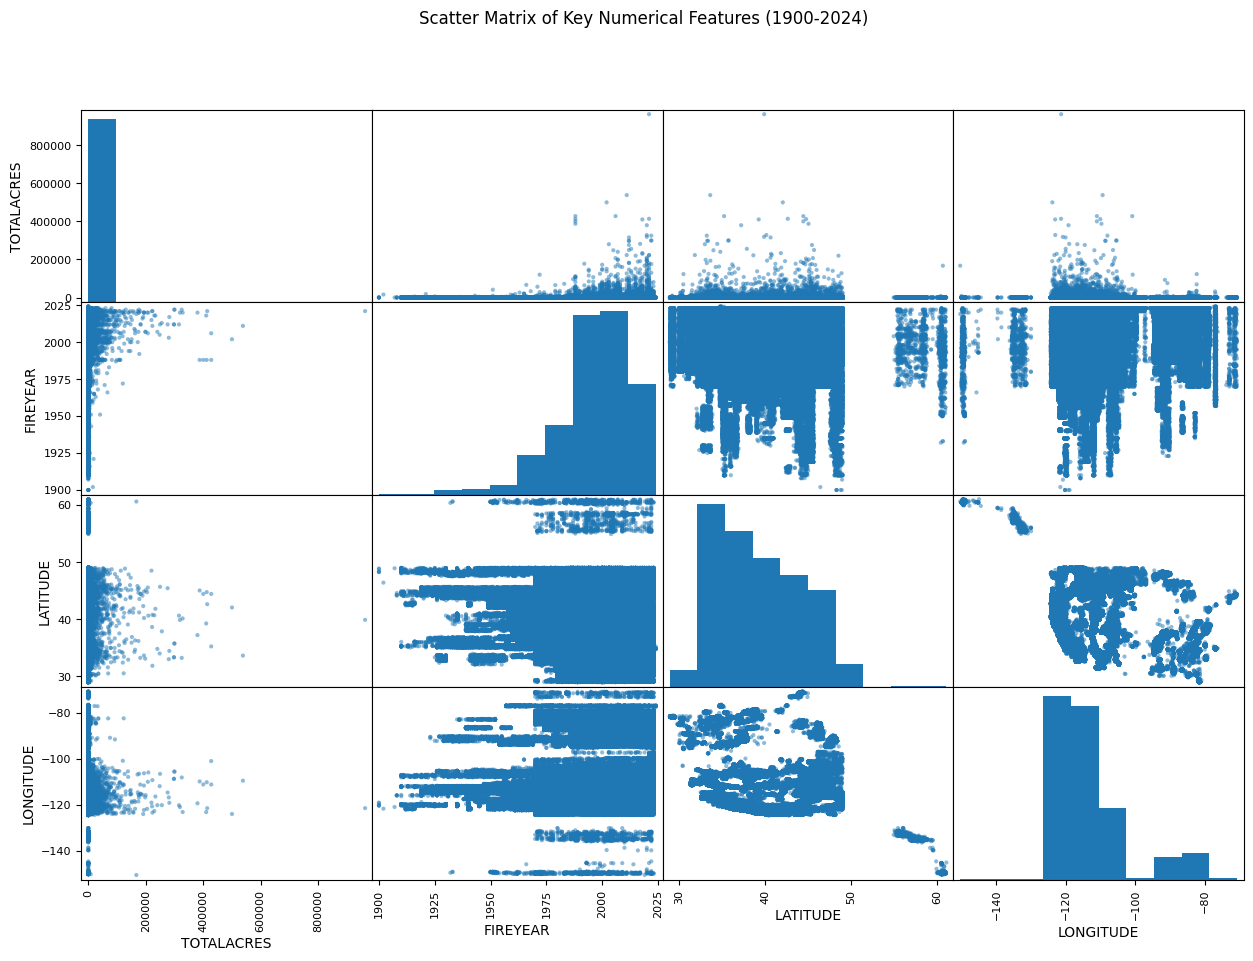

In [ ]:
def relationship_visualization(sample_us_fires):

    # Check if the columns exist before selecting them
    selected_columns = ['TOTALACRES', 'FIREYEAR', 'LATITUDE', 'LONGITUDE']

    # Filter the DataFrame for years 1900 to 2024
    filtered_us_fires = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)]

    filtered_us_fires = filtered_us_fires.reset_index()  # Resetting the index of the filtered DataFrame
    axes = scatter_matrix(filtered_us_fires[selected_columns], figsize=(15, 10))  # Use selected_columns and filtered_us_fires
    plt.suptitle('Scatter Matrix of Key Numerical Features (1900-2024)')
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Scatter Matrix**:

###Relationships between Features: The scatter matrix visualizes the relationships between pairs of numerical features. Each scatter plot in the matrix shows the relationship between two features, allowing you to identify potential correlations, patterns, or clusters in the data.
###Example: A scatter plot of TOTALACRES versus FIREYEAR might reveal a trend of increasing fire sizes over time, suggesting a potential impact of climate change.

##**Overall Interpretation**:

###By analyzing these visualizations together, you can gain a deeper understanding of the relationships between different features in the dataset.

###Correlations: Identify potential correlations between features, such as a positive correlation between TOTALACRES and FIREYEAR, indicating that larger fires tend to occur in more recent years.
###Patterns and Trends: Observe patterns or trends in the data, such as increasing fire sizes over time or differences in fire size distributions across different causes.
###Outliers: Identify potential outliers that might require further investigation or special handling during analysis.
###Data Understanding: Gain a comprehensive understanding of the data's structure and the relationships between its features.